# UOP-story-telling-project
## Author: Xi Liang
### Objectives:

The topic of excessive force and police brutality has been rampant recently in America, among all subtopics, police killing is among the most sensitive and most covered. The main purpose of this project is answer some of the questions I have in mind:
* Is the police killing count increasing or decreasing?
* How police killing correlate demographic information like income, high school completion rate, race distribution, etc?
* Are there certain races that are more proned to police killing?

# Table of Contents

1. [Loading Packages and Data](#Loading Packages)
2. [Exploring Data](#EDA) <br>
     2.1 [Income](#income) <br>
     2.2 [High School Completion](#hs) <br>
     2.3 [Poverty](#poverty) <br>
     2.4 [Race Distribution's Correlation with Income, HS Completion Rate, and Poverty](#cor1) <br>
     2.5 [Police Killing](#police_killing) <br>
3. [A Deep Dive Into the Disparities in Use of Deadly Force](#in-depth) <br>
     3.1 [People Not Attacking but Killed](#not_attack_but_killed) <br>
     3.2 [Unarmed Victims in Police Killings Are More Likely to Be Minorities](#unarmed) <br>
4. [Conclusions](#conclusion) <br>

# Loading Packages and Data
<a id = 'Loading Packages'></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import plotly.plotly as py
import plotly 
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
plotly.tools.set_credentials_file(username='manunited890300', api_key='Snr8S4I7xVvModPeJTHA')


import seaborn as sns

import datetime as dt

%matplotlib inline

In [9]:
income = pd.read_csv('data/MedianHouseholdIncome2015.csv', encoding = "ISO-8859-1")

In [10]:
hs = pd.read_csv('data/PercentOver25CompletedHighSchool.csv', encoding = "ISO-8859-1")

In [11]:
pct_below_poverty = pd.read_csv('data/PercentagePeopleBelowPovertyLevel.csv', encoding = "ISO-8859-1")

In [12]:
police_killing = pd.read_csv('data/PoliceKillingsUS.csv', encoding = "ISO-8859-1")

In [13]:
race = pd.read_csv('data/ShareRaceByCity.csv', encoding = "ISO-8859-1")

## Exploring Data
<a id = 'EDA'></a>

### Income
<a id = 'income'></a>

In this section, we would like to explore the income situation in all the states.

In [46]:
income.columns = [i.replace(" ", "_") for i in income.columns]

In [47]:
income.columns = [i.lower() for i in income.columns]

In [243]:
#income.info()

In [49]:
income.median_income = income.median_income.replace('(X)', np.nan)
income.median_income = income.median_income.replace('-', np.nan)
income.median_income = income.median_income.replace('2,500-', '25000')
income.median_income = income.median_income.replace('250,000+', '250000')

In [50]:
income.median_income = income.median_income.astype(np.float)

In [245]:
#income.head()

In [244]:
#income.tail()

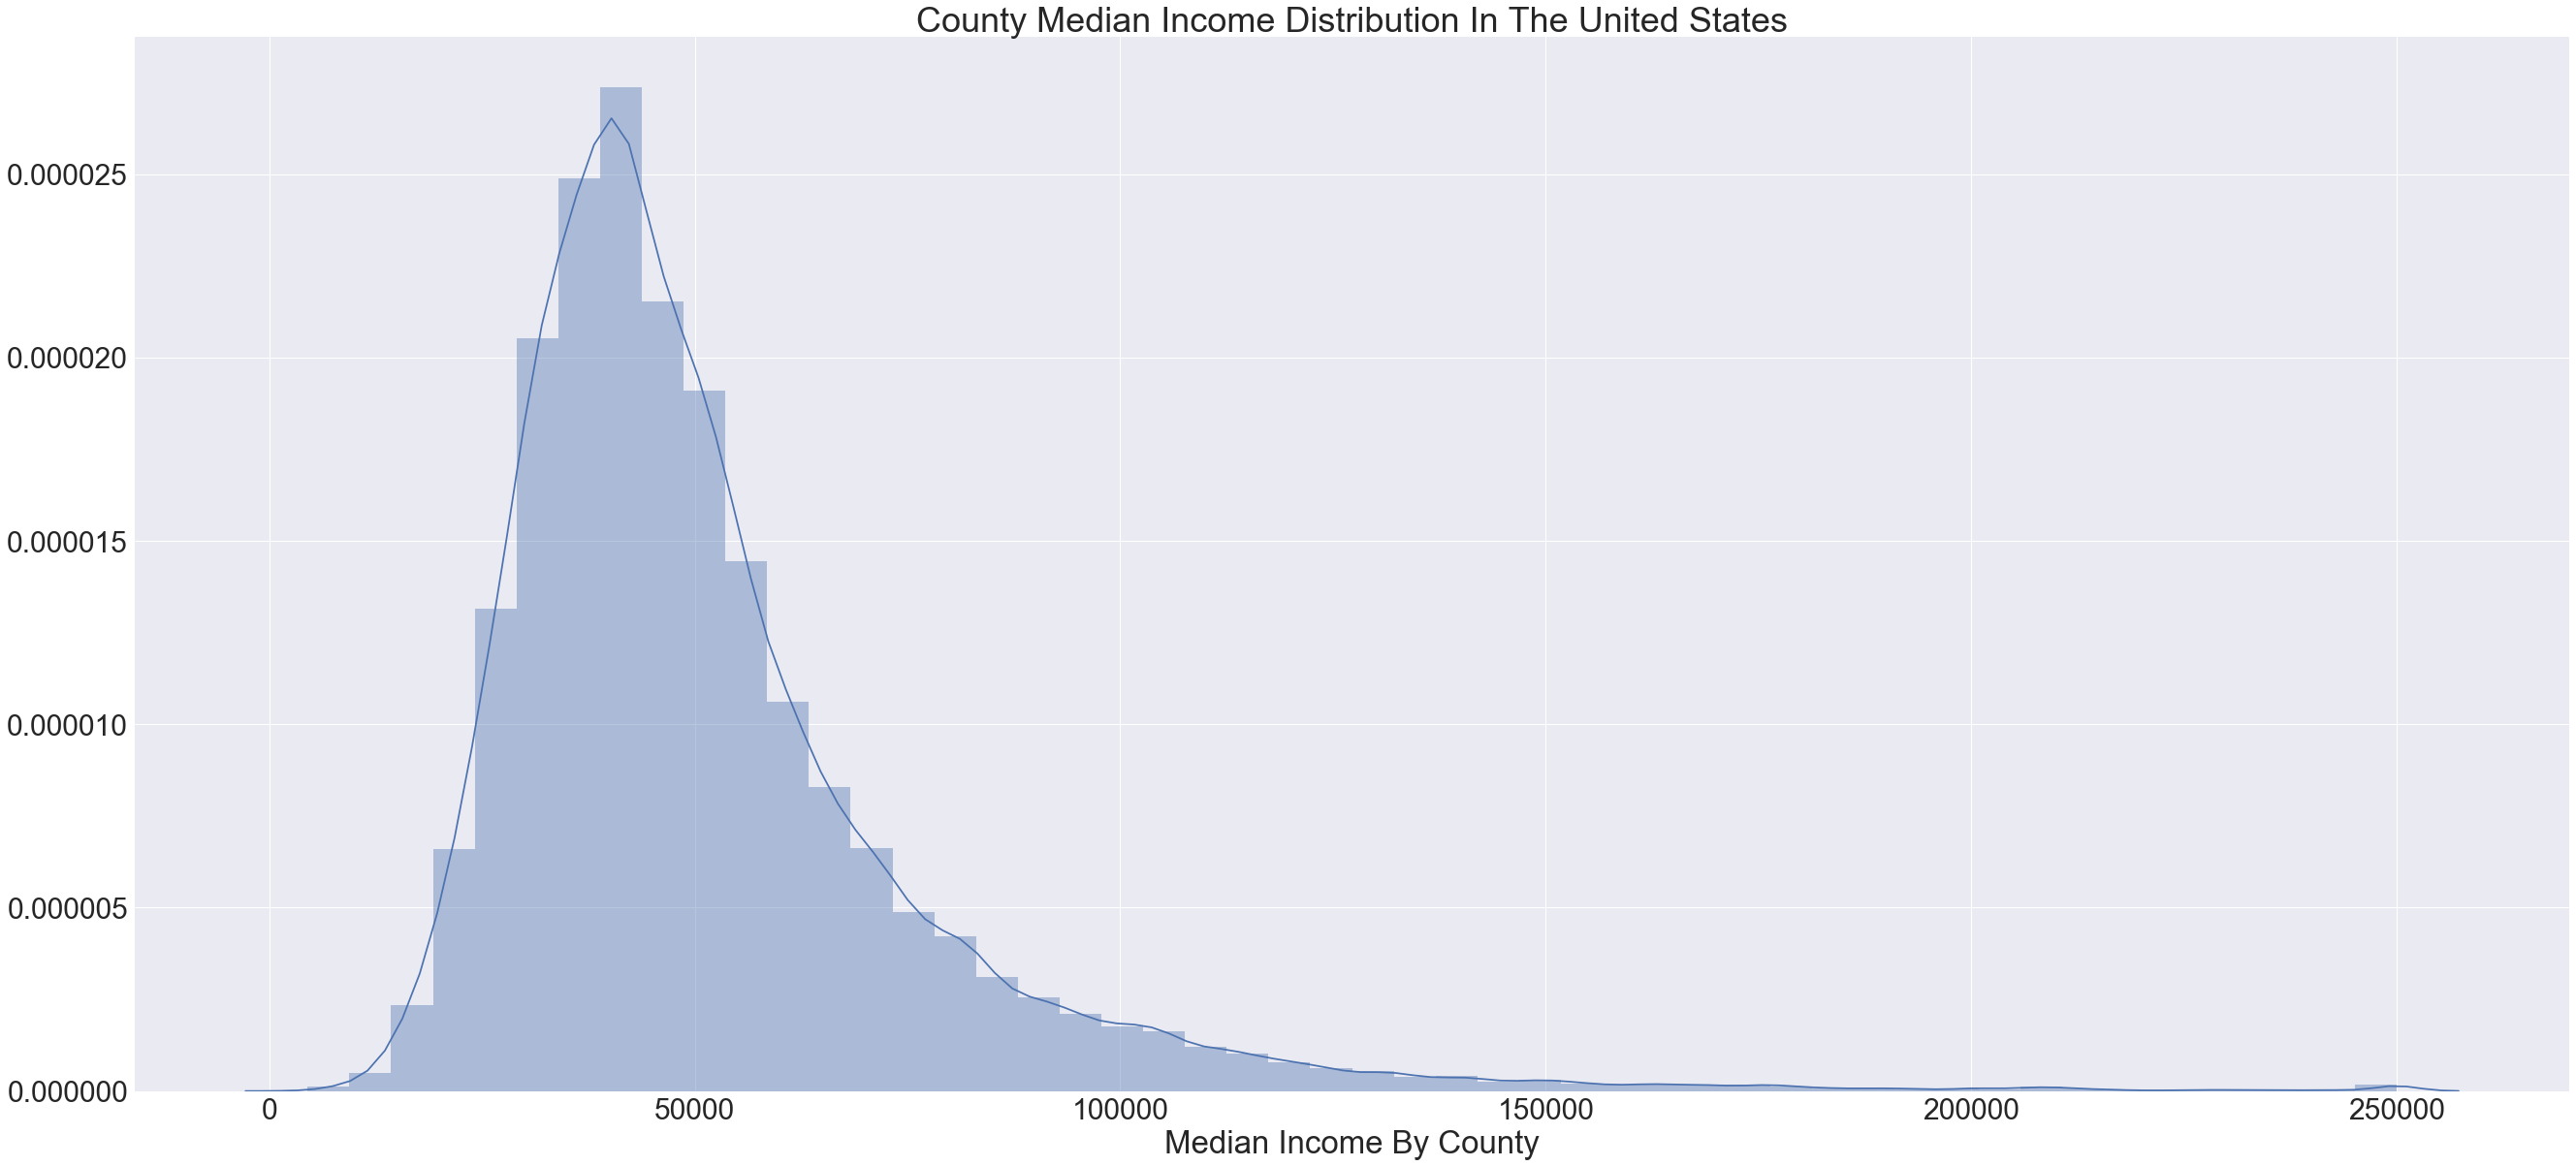

In [58]:
median_for_dist = income.median_income.dropna()

sns.set(font_scale = 3)
plt.figure(figsize=(45,20))
sns.distplot(median_for_dist)
plt.title('County Median Income Distribution In The United States')
plt.xlabel('Median Income By County')

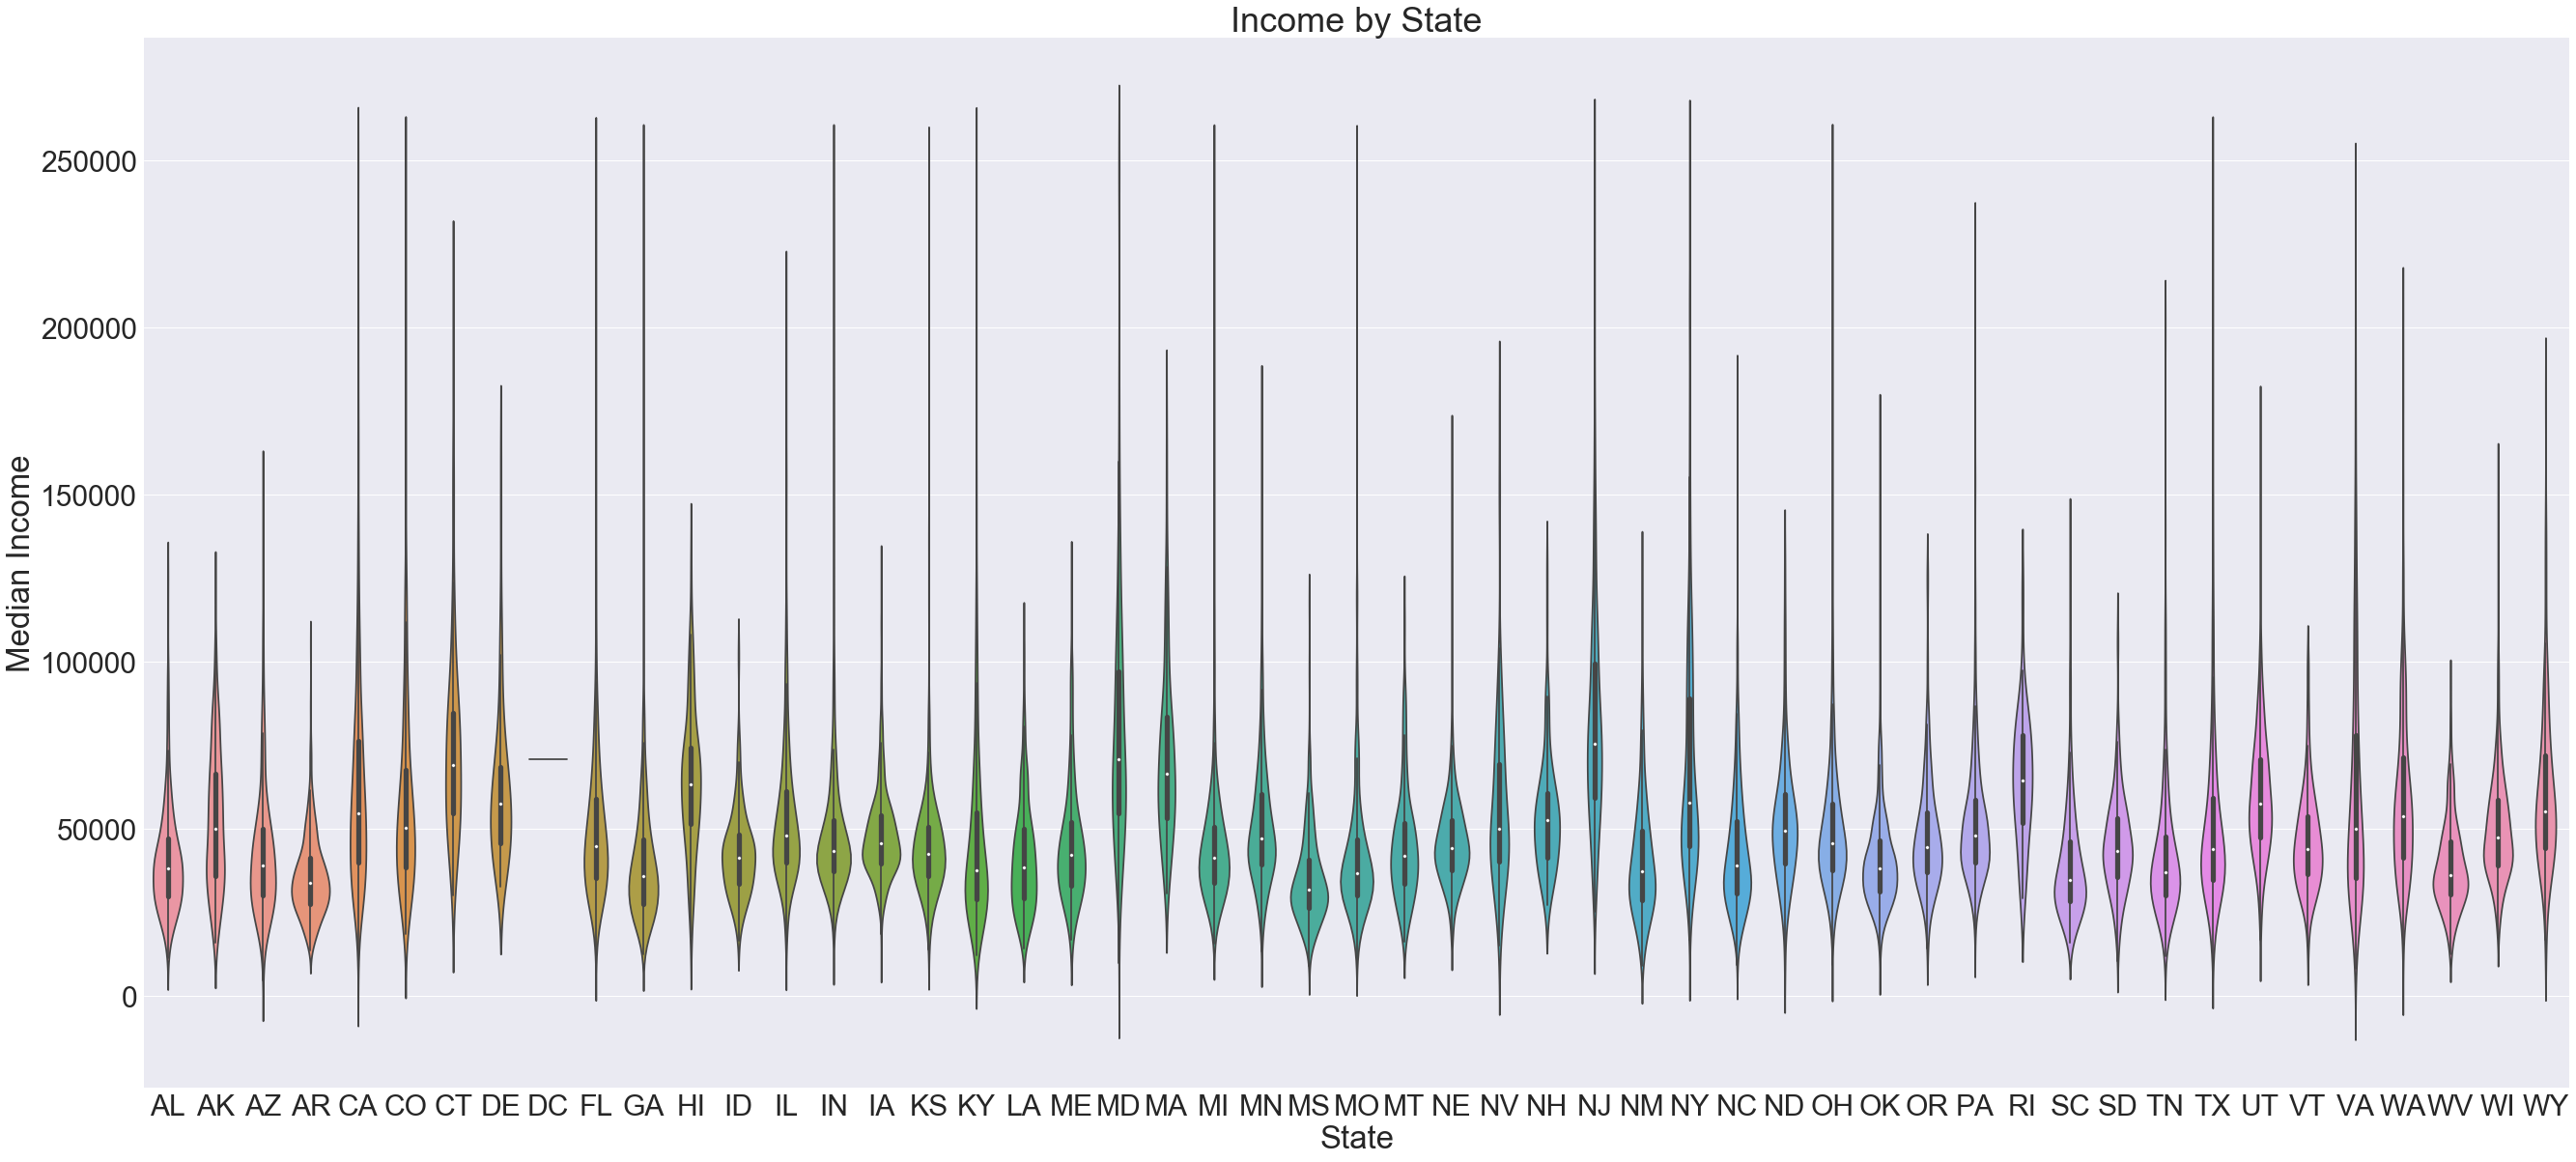

In [54]:
sns.set_context("talk")
sns.set(font_scale = 3)
plt.figure(figsize=(45,20))

fig1 = sns.violinplot(x = 'geographic_area', y = 'median_income', data=income)
#fig1 = sns.swarmplot(x = 'geographic_area', y = 'median_income', data = income, color = 'white')
fig1.set_title('Income by State')
fig1.set_xlabel('State')
fig1.set_ylabel('Median Income')

In [55]:
median_income = pd.DataFrame(income.groupby('geographic_area').median_income.median().reset_index())

In [60]:
init_notebook_mode(connected=True)  

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = median_income['geographic_area'],
        z = median_income['median_income'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "USD")
        ) ]


layout = dict(
        title = 'Median Income by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot(fig)

We can see that most of the relatively high median income states are costal states, for example, California, Washington, New Jersey, Connecticut, etc.

### High School Completion
<a id = 'hs'></a>

The purpose of this section is to explore high school completion rate in each state. In order to generate our choropleth, we would use the state's median high school completion rate.

In [26]:
hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [27]:
hs.tail()

,Geographic Area,City,percent_completed_hs
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4
29328,WY,Y-O Ranch CDP,100


In [28]:
hs.columns = [i.replace(" ", "_") for i in hs.columns]
hs.columns = [i.lower() for i in hs.columns]

In [29]:
hs.columns

Index(['geographic_area', 'city', 'percent_completed_hs'], dtype='object')

In [30]:
hs.percent_completed_hs = hs.percent_completed_hs.replace('-', np.nan)

In [31]:
hs.percent_completed_hs = hs.percent_completed_hs.astype(np.float)

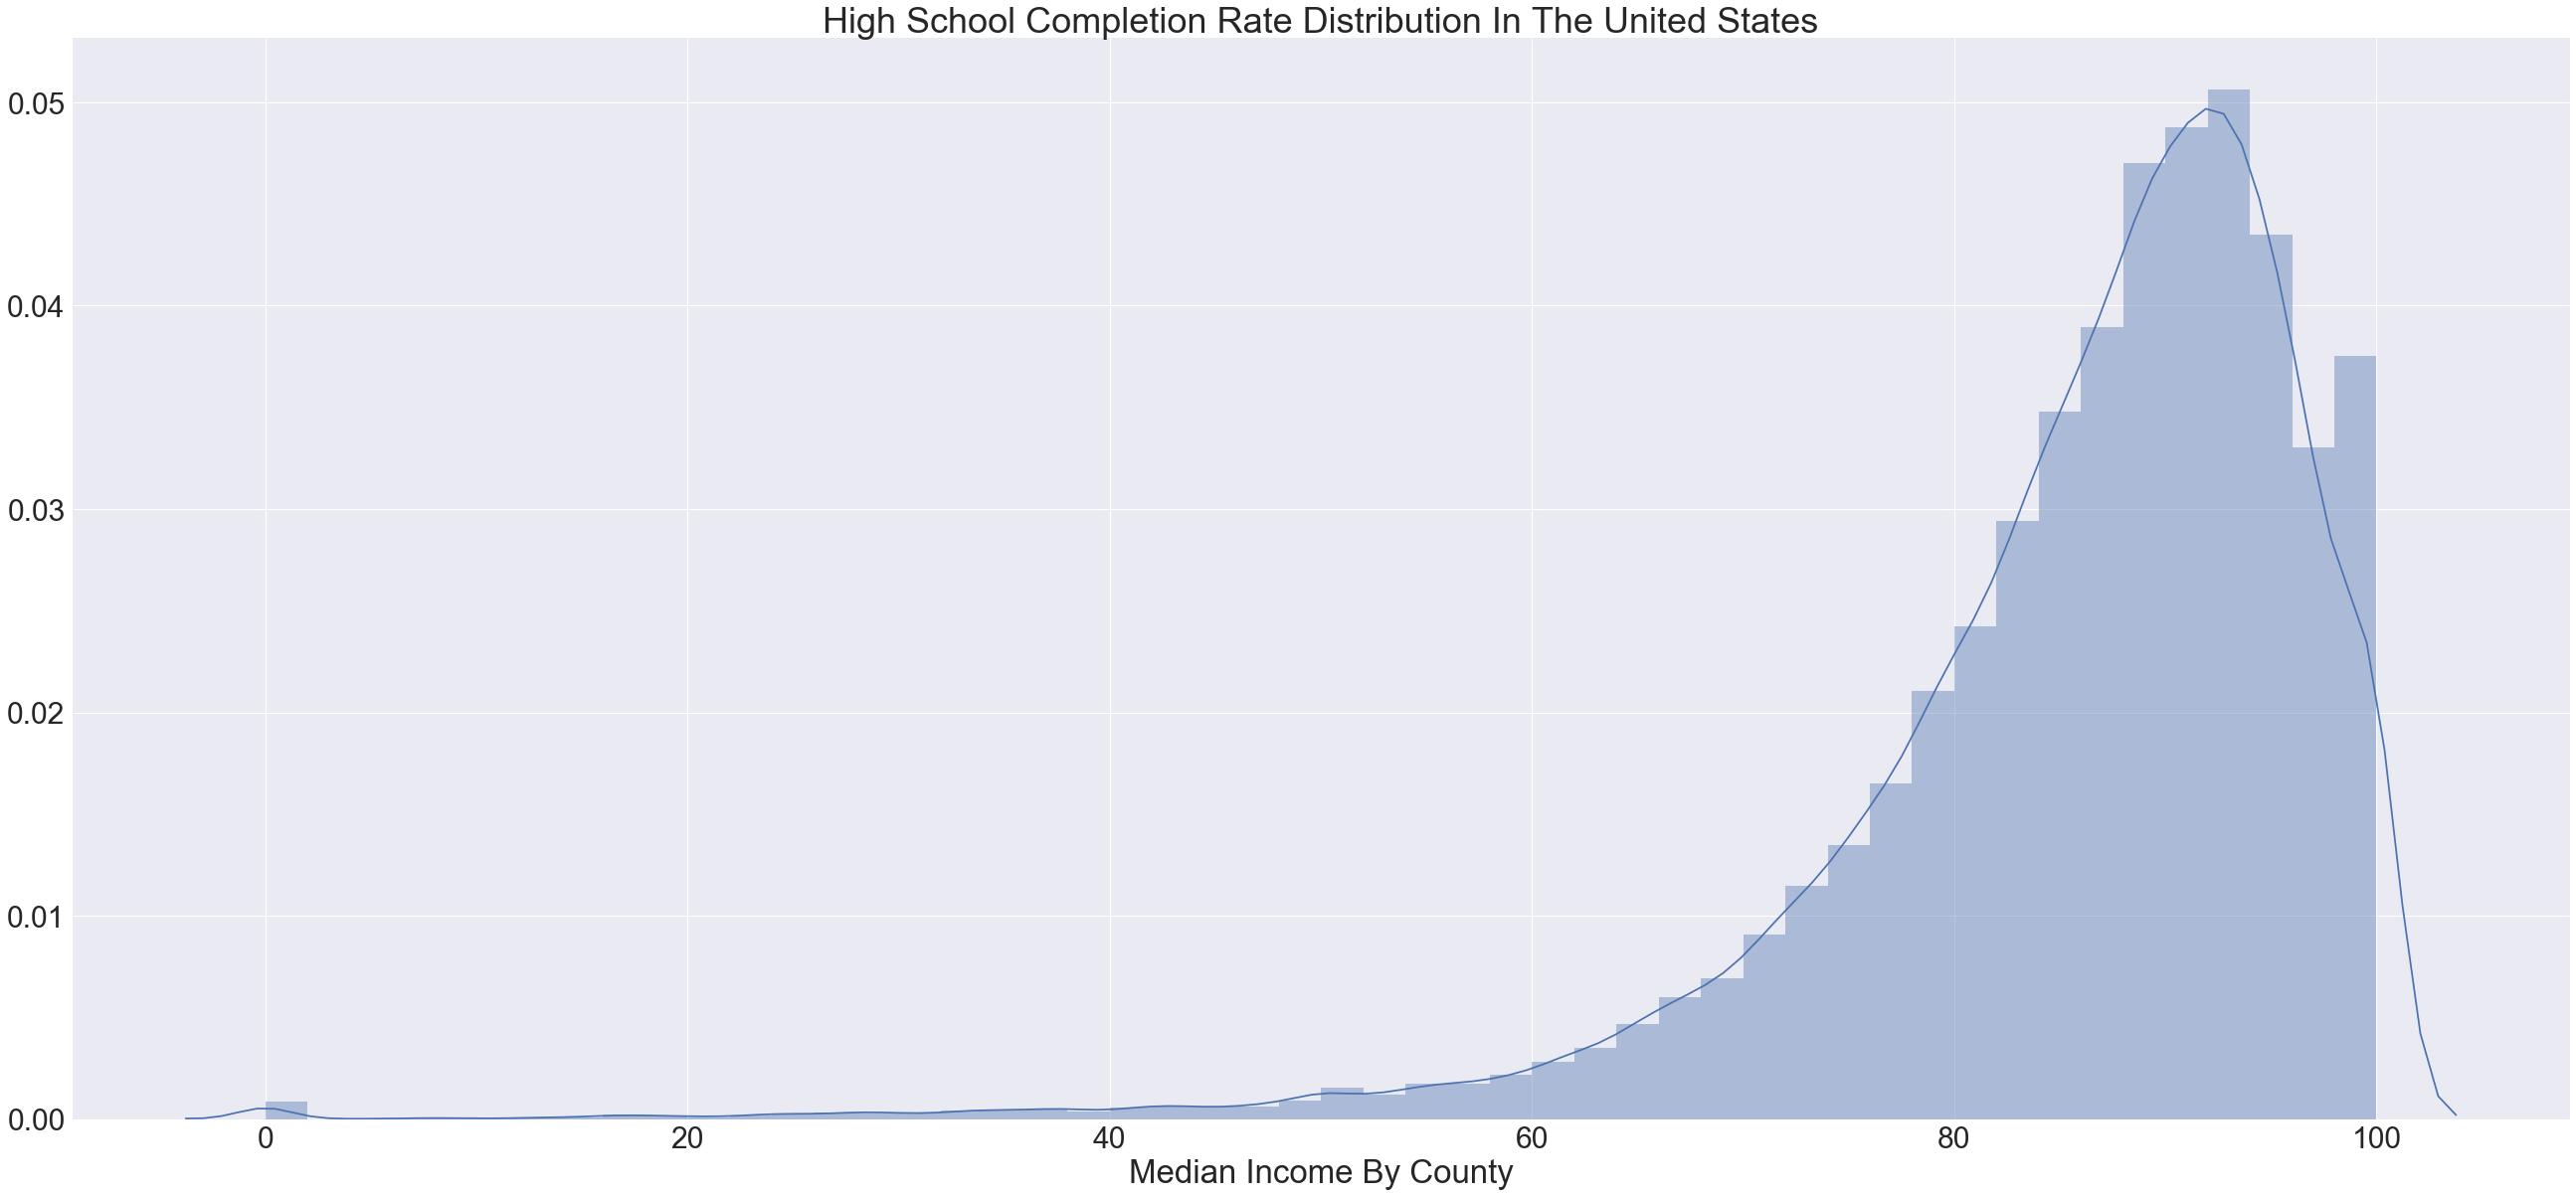

In [78]:
hspct_dist = hs.percent_completed_hs.dropna()

sns.set(font_scale = 3)
plt.figure(figsize=(45,20))
sns.distplot(hspct_dist)
plt.title('High School Completion Rate Distribution In The United States')
plt.xlabel('Median Income By County')

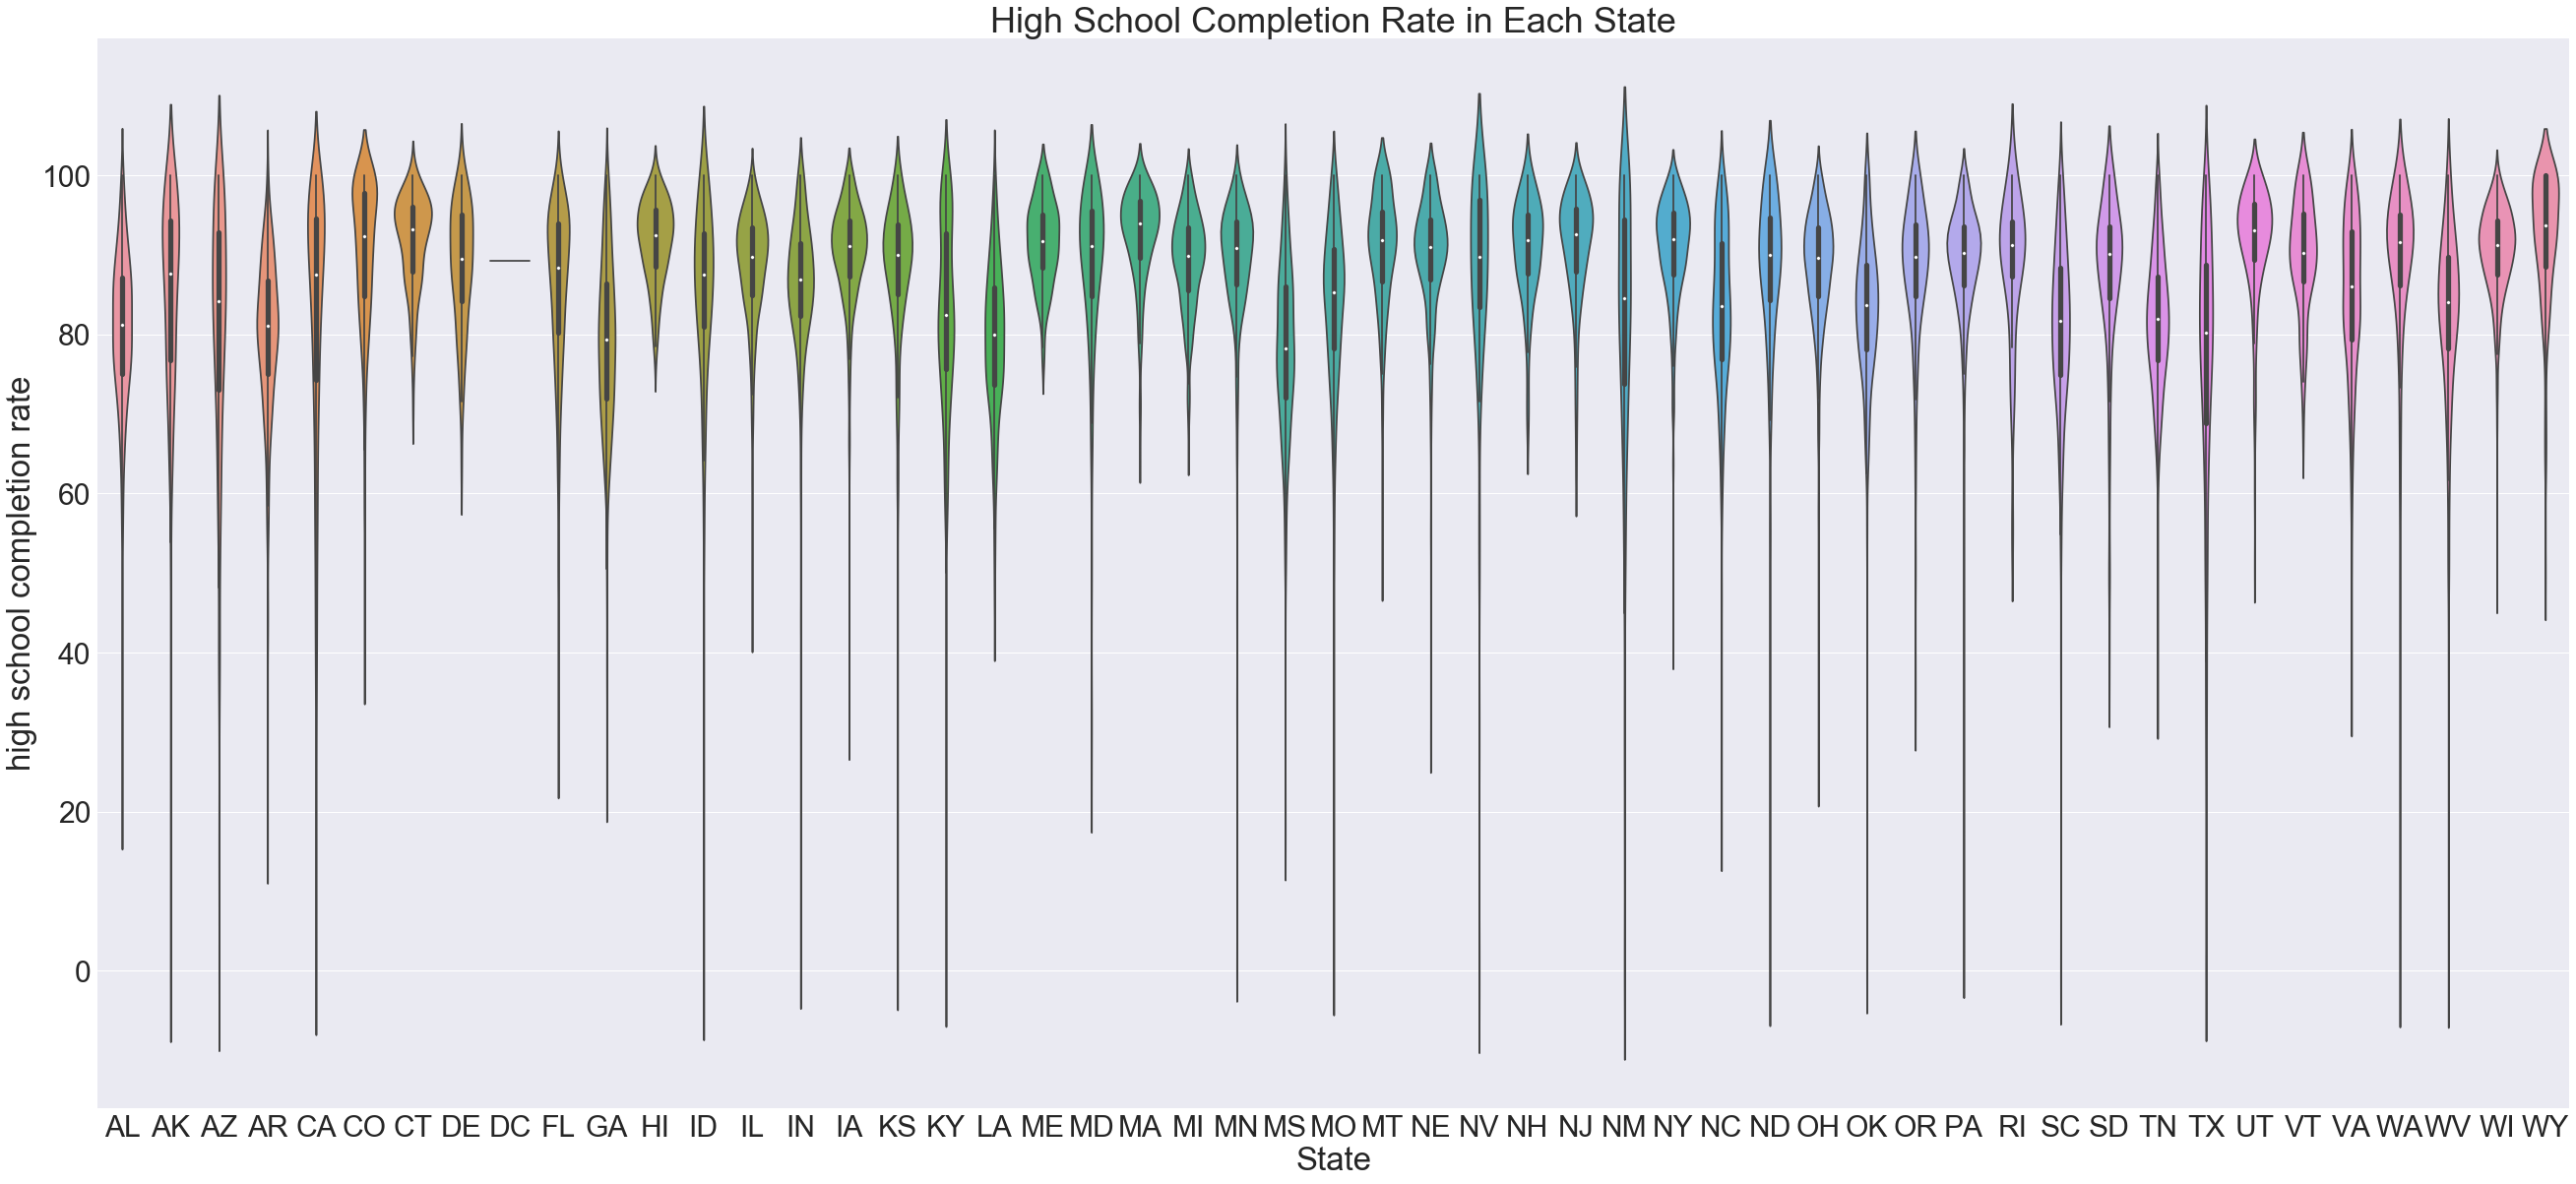

In [32]:
#sns.set_context("talk")
sns.set(font_scale = 3)
plt.figure(figsize=(45,20))

fig2 = sns.violinplot(x = 'geographic_area', y = 'percent_completed_hs', data=hs)
fig2.set_title('High School Completion Rate in Each State')
fig2.set_xlabel('State')
fig2.set_ylabel('high school completion rate')

#### Calculate the median high school completion rate by state

In [33]:
hs_median = hs.groupby('geographic_area').percent_completed_hs.median().reset_index()

In [240]:
#hs_median.head()

In [35]:
init_notebook_mode(connected=True)  

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = hs_median['geographic_area'],
        z = hs_median['percent_completed_hs'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "HS Completion Rate")
        ) ]


layout = dict(
        title = 'Median HS Completion Percentage by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot(fig)

### Poverty 
<a id = 'poverty'></a>

The poverty rate is defined by percentage of people living below the poverty line. Let's take a look at what's the distribution like.

In [241]:
#pct_below_poverty.head()

In [242]:
#pct_below_poverty.tail()

In [74]:
pct_below_poverty.columns = [i.replace(" ", "_").lower() for i in pct_below_poverty.columns]

In [75]:
pct_below_poverty.poverty_rate = pct_below_poverty.poverty_rate.replace('-', np.nan)
pct_below_poverty.poverty_rate = pct_below_poverty.poverty_rate.astype(np.float)

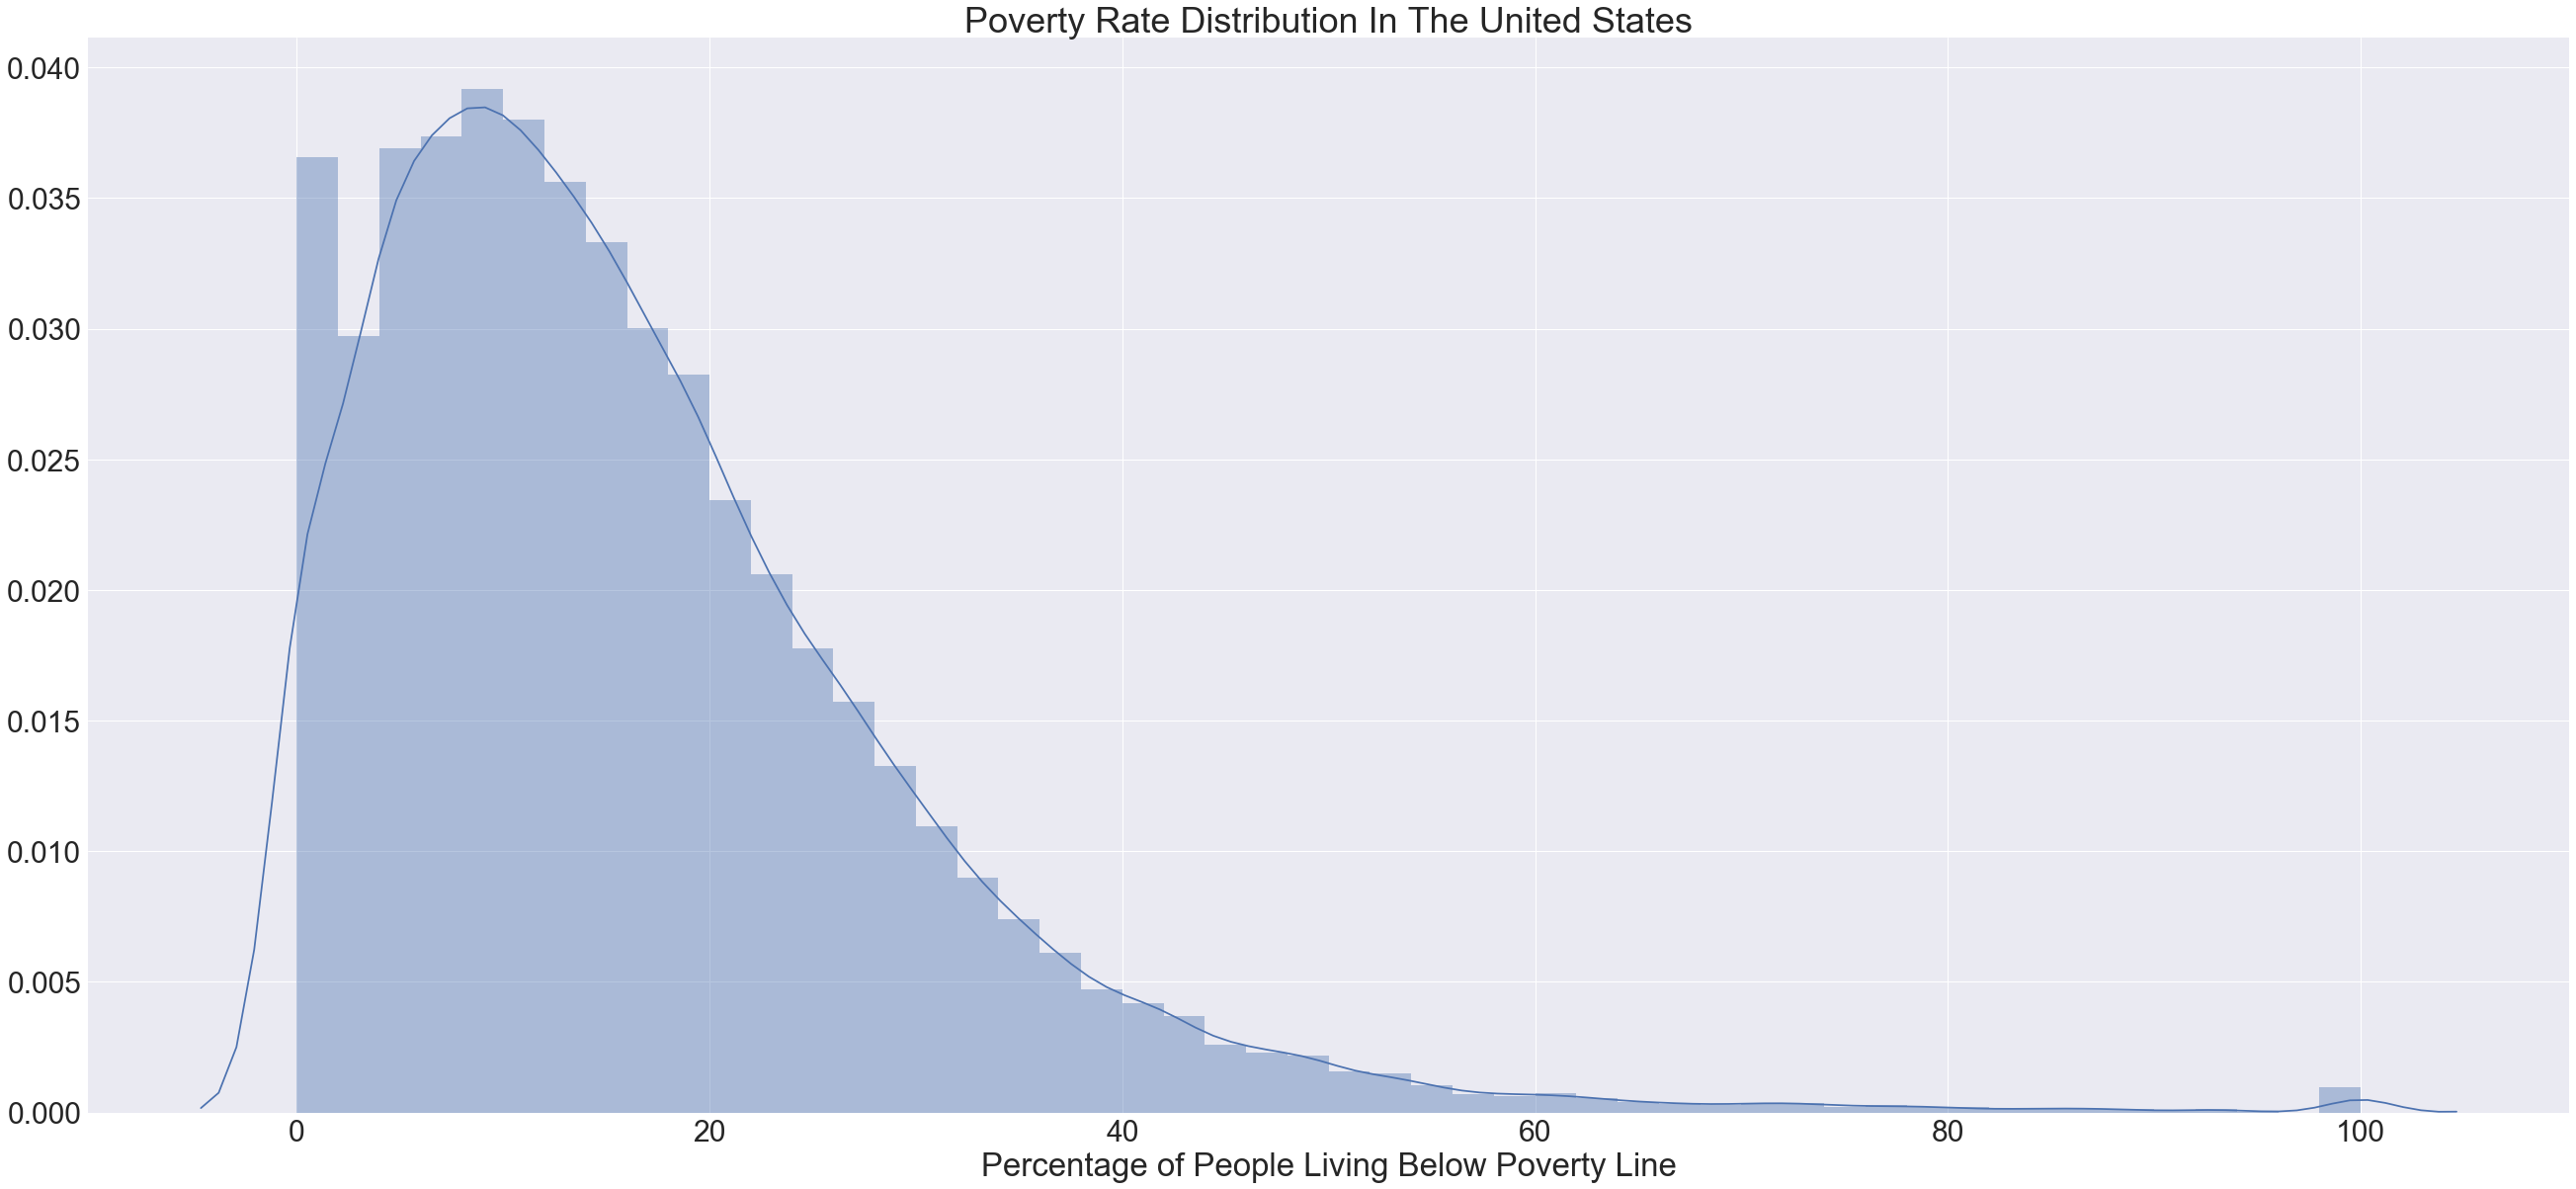

In [77]:
poverty_dist = pct_below_poverty.poverty_rate.dropna()

sns.set(font_scale = 3)
plt.figure(figsize=(45,20))
sns.distplot(poverty_dist)
plt.title('Poverty Rate Distribution In The United States')
plt.xlabel('Percentage of People Living Below Poverty Line')

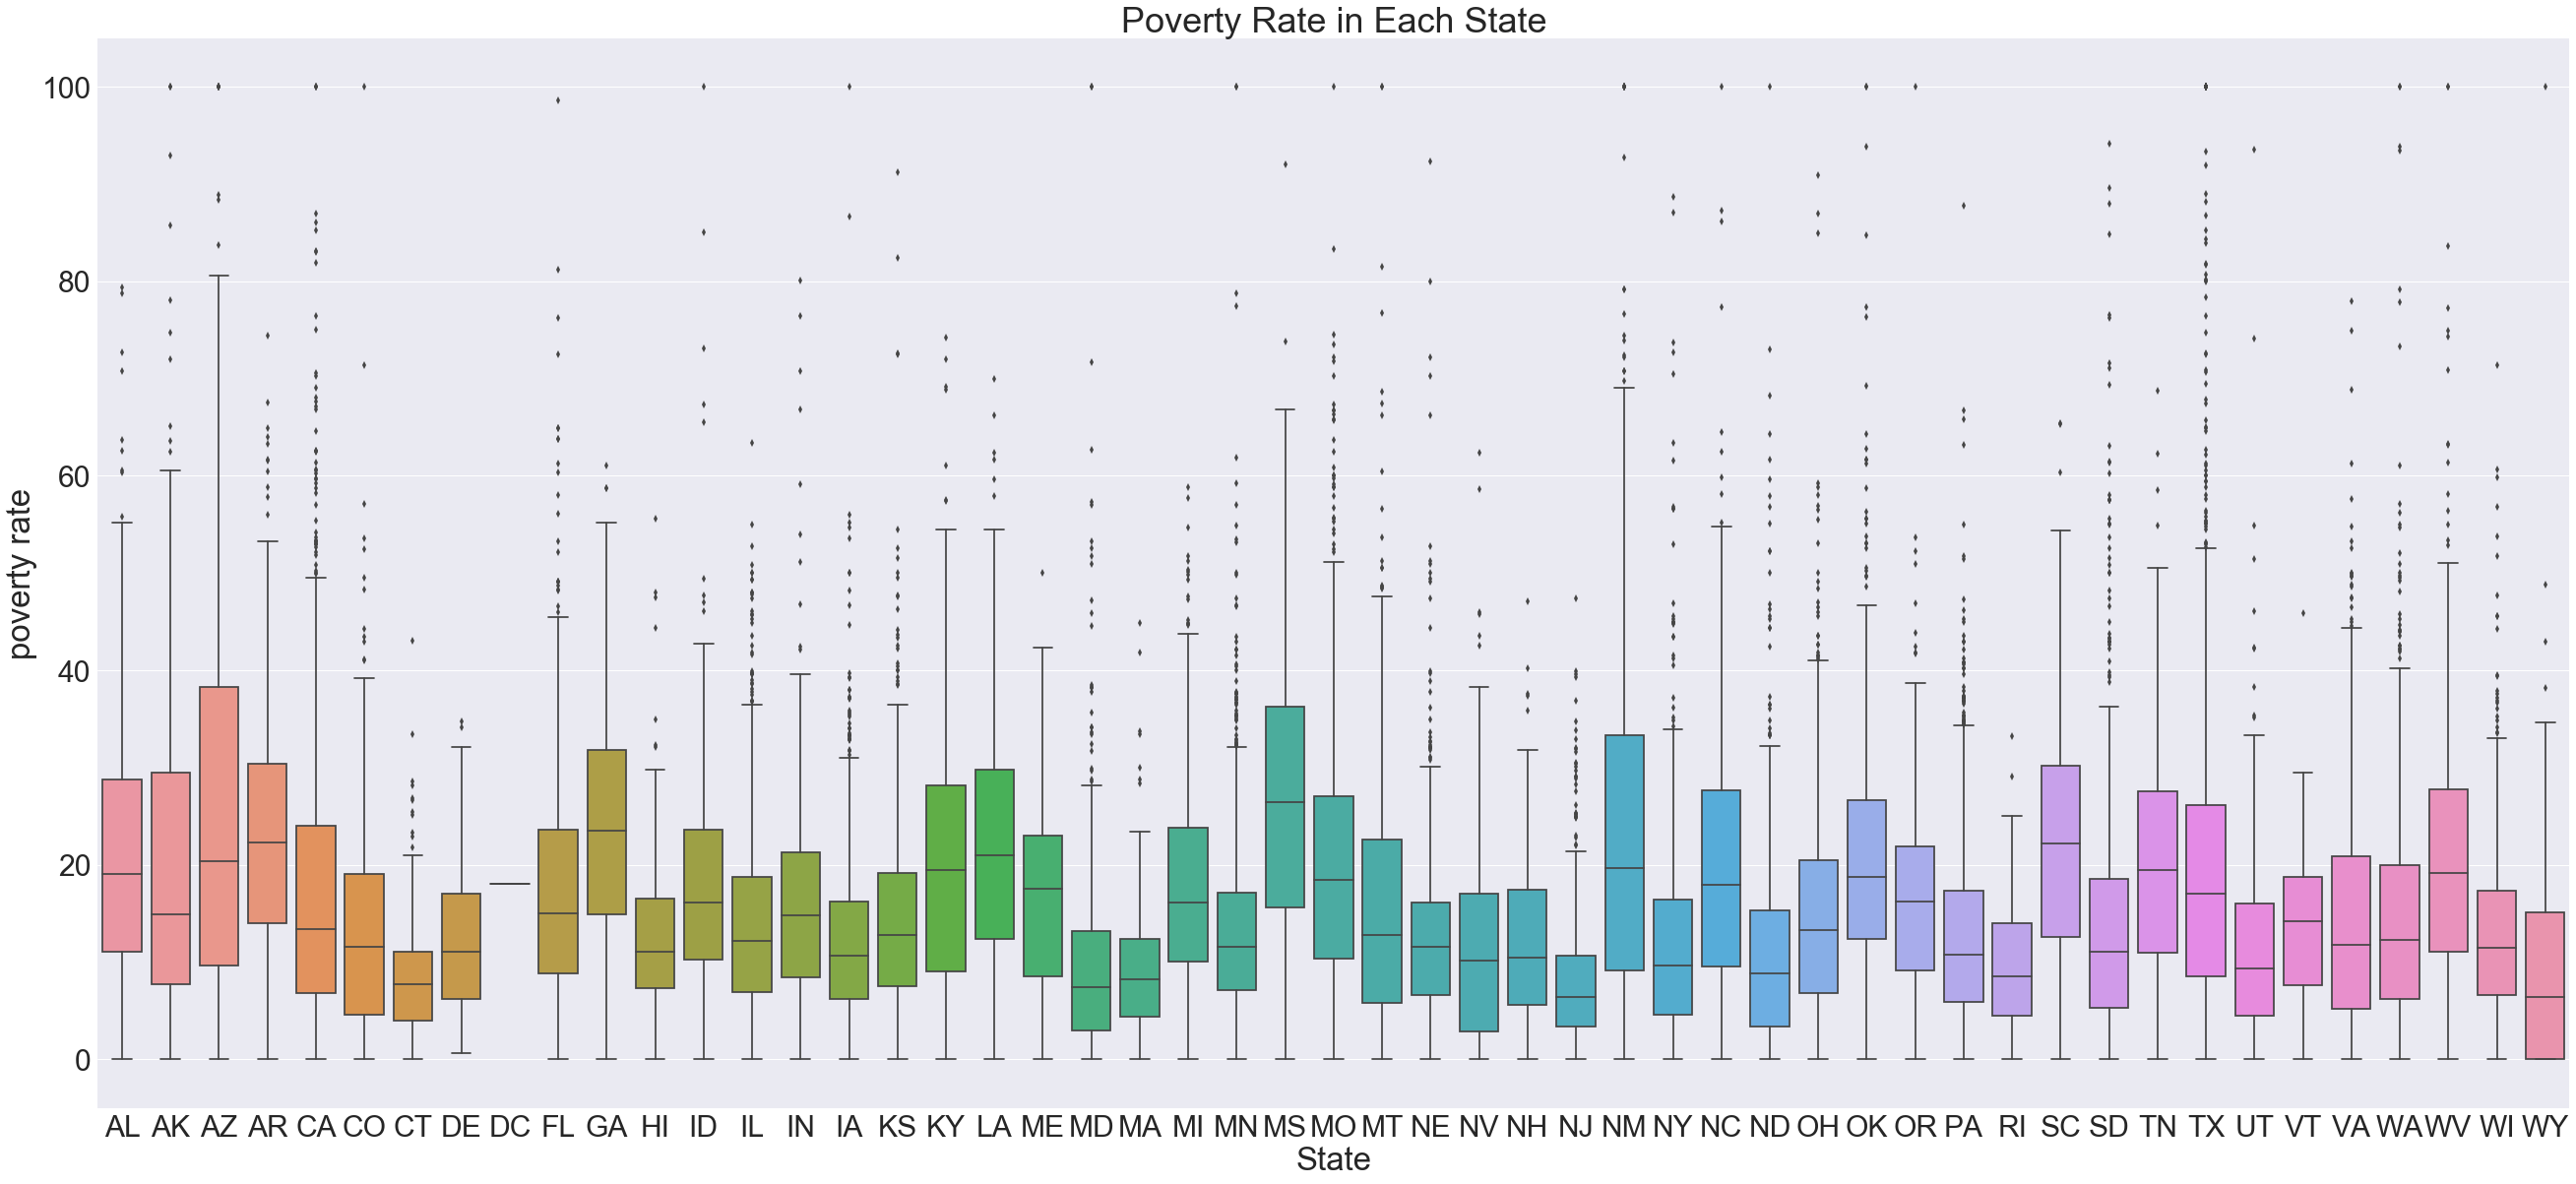

In [79]:
sns.set(font_scale = 3)
plt.figure(figsize=(45,20))

fig3 = sns.boxplot(x = 'geographic_area', y = 'poverty_rate', data=pct_below_poverty)
fig3.set_title('Poverty Rate in Each State')
fig3.set_xlabel('State')
fig3.set_ylabel('poverty rate')

#### Calculate the median percentage below poverty rate by state

In [84]:
median_poverty = pct_below_poverty.groupby('geographic_area').poverty_rate.median().reset_index()

In [89]:
init_notebook_mode(connected=True)  

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = median_poverty['geographic_area'],
        z = median_poverty['poverty_rate'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "% of People Living Below Poverty Line")
        ) ]


layout = dict(
        title = 'Percentage of People Living Under Poverty Line by State <br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
plotly.offline.iplot(fig)

### How race corrleates with attributes above
<a id = 'cor1'></a>

In [90]:
race.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [91]:
race.columns = [i.replace(" ", "_") for i in race.columns]
race.columns = [i.lower() for i in race.columns]

In [92]:
for i in range(2,7):
    race.iloc[:,i]= race.iloc[:,i].replace('(X)', np.nan).astype('float')

In [93]:
merge_tmp = pd.merge(income, hs, on = ['geographic_area','city'], how = 'inner')
merge_tmp = pd.merge(merge_tmp, pct_below_poverty, on = ['geographic_area','city'], how = 'inner')
merge_df = pd.merge(merge_tmp, race, on = ['geographic_area','city'], how = 'inner')

In [94]:
merge_corr = merge_df.iloc[:,2:].corr()

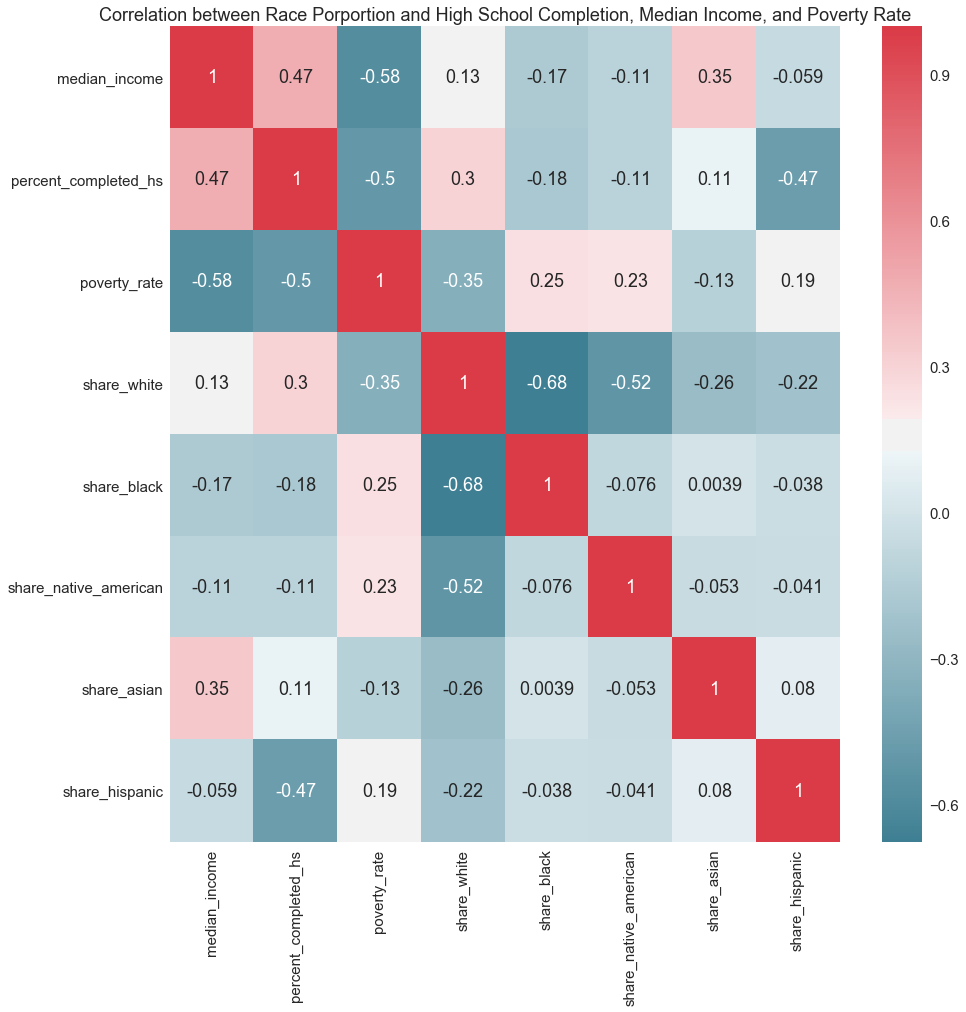

In [231]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,15))
sns.heatmap(merge_corr, cmap=cmap, annot= True)
plt.title('Correlation between Race Porportion and High School Completion, Median Income, and Poverty Rate')

The correlation plot above is very informative. We can see that in area that has high poverty rate, we see a strong negative correlation with high scool completion percentage, also, in regions that have high percentage of Hispanic residents, the percentage of high school completion is low. In addition, we see that when a city/state has high percentage of white residents, the precentages of black and native American residents are low. Also, regions that have more Asian residents tend to have higher median incomes.

### Police Killing
<a id = 'police_killing'></a>

The purpose of this section is to answer the two questions:
    1. Is the police incident rate dropping or increasing?
    2. Is there disparities in how police using their deadly forces?

#### Dropping or Increasing?

In [239]:
#police_killing.head()

In [104]:
police_killing.date = pd.to_datetime(police_killing.date)
police_killing['month_year'] = police_killing.date.dt.to_period('M')

In [105]:
kill_by_month_df = pd.Series.from_array(police_killing.month_year.value_counts()).reset_index()
kill_by_month_df.columns = ['date', 'kill_count']
kill_by_month_df = kill_by_month_df.sort_values(by = 'date')

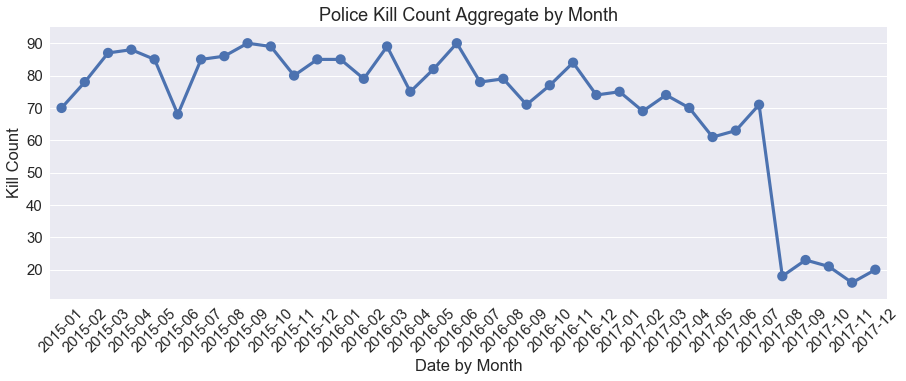

In [106]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,5))

fig = sns.pointplot(x = 'date', y = 'kill_count', data = kill_by_month_df)

plt.xticks(rotation=45)

plt.title('Police Kill Count Aggregate by Month')
plt.ylabel('Kill Count')
plt.xlabel('Date by Month')

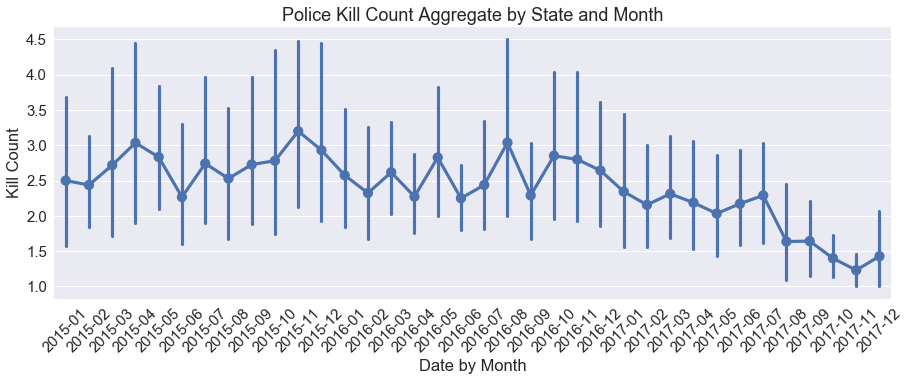

In [107]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,5))
kill_by_month = police_killing.groupby('state').month_year.value_counts().reset_index(name = 'kill_count')
kill_by_month = kill_by_month.sort_values(by='month_year')

sns.pointplot(x = 'month_year', y = 'kill_count', data = kill_by_month)
plt.xticks(rotation=45)

plt.title('Police Kill Count Aggregate by State and Month')
plt.ylabel('Kill Count')
plt.xlabel('Date by Month')

When I aggreated the data by state and month, we can see the trend is generally decreasing. Next step, I will try to break down this statistics further more.

#### Killing Aggreate by State

In [108]:
police_killing.date = pd.to_datetime(police_killing.date)
police_killing['month_year'] = police_killing.date.dt.to_period('M')
killing_ts = police_killing.groupby(['state','month_year']).month_year.count().reset_index(name = 'kill_count')
killing_ts.death_count = killing_ts.kill_count.astype(np.float)
killing_ts.month_year = [pd.to_datetime(str(i)) for i in killing_ts.month_year]

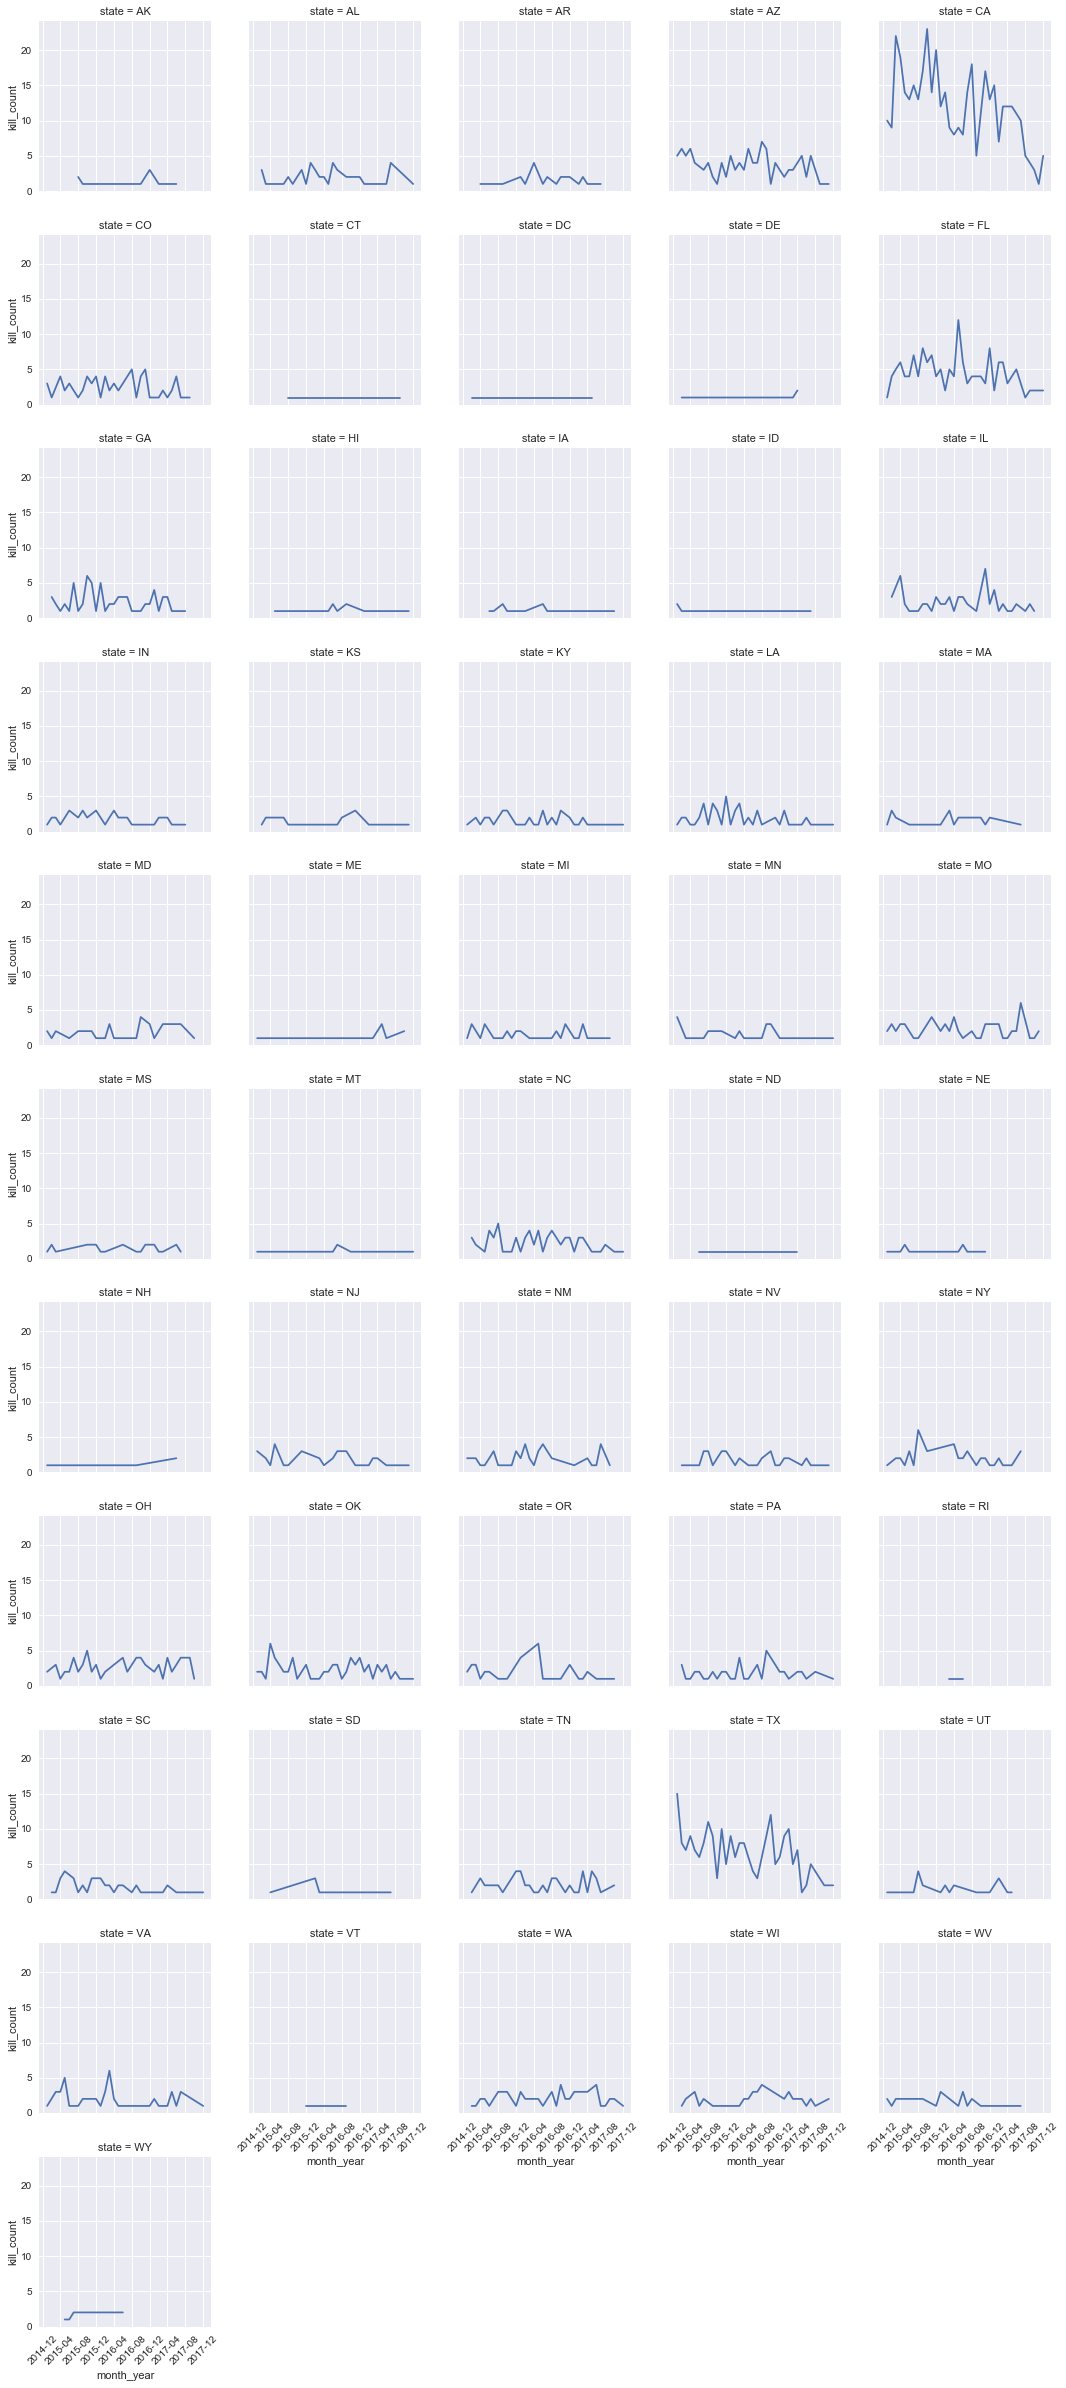

In [109]:
sns.set(style="ticks", color_codes=True)
sns.set(font_scale = 1)
kill_by_state = sns.FacetGrid(killing_ts, col ='state', col_wrap = 5, size = 3)
kill_by_state = kill_by_state.map(plt.plot, 'month_year', 'kill_count')

for ax in kill_by_state.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

As we can see, most states have pretty much stable trend, but states like California and Texas showed a decreasing trend, and the decreasing national police killing count might be contributed by both of these states, since we can see that their average killing count are higher than most of the states. To answer our question: yes, the total polie count is decreasing.

#### Disparities in Using Deadly Forces?

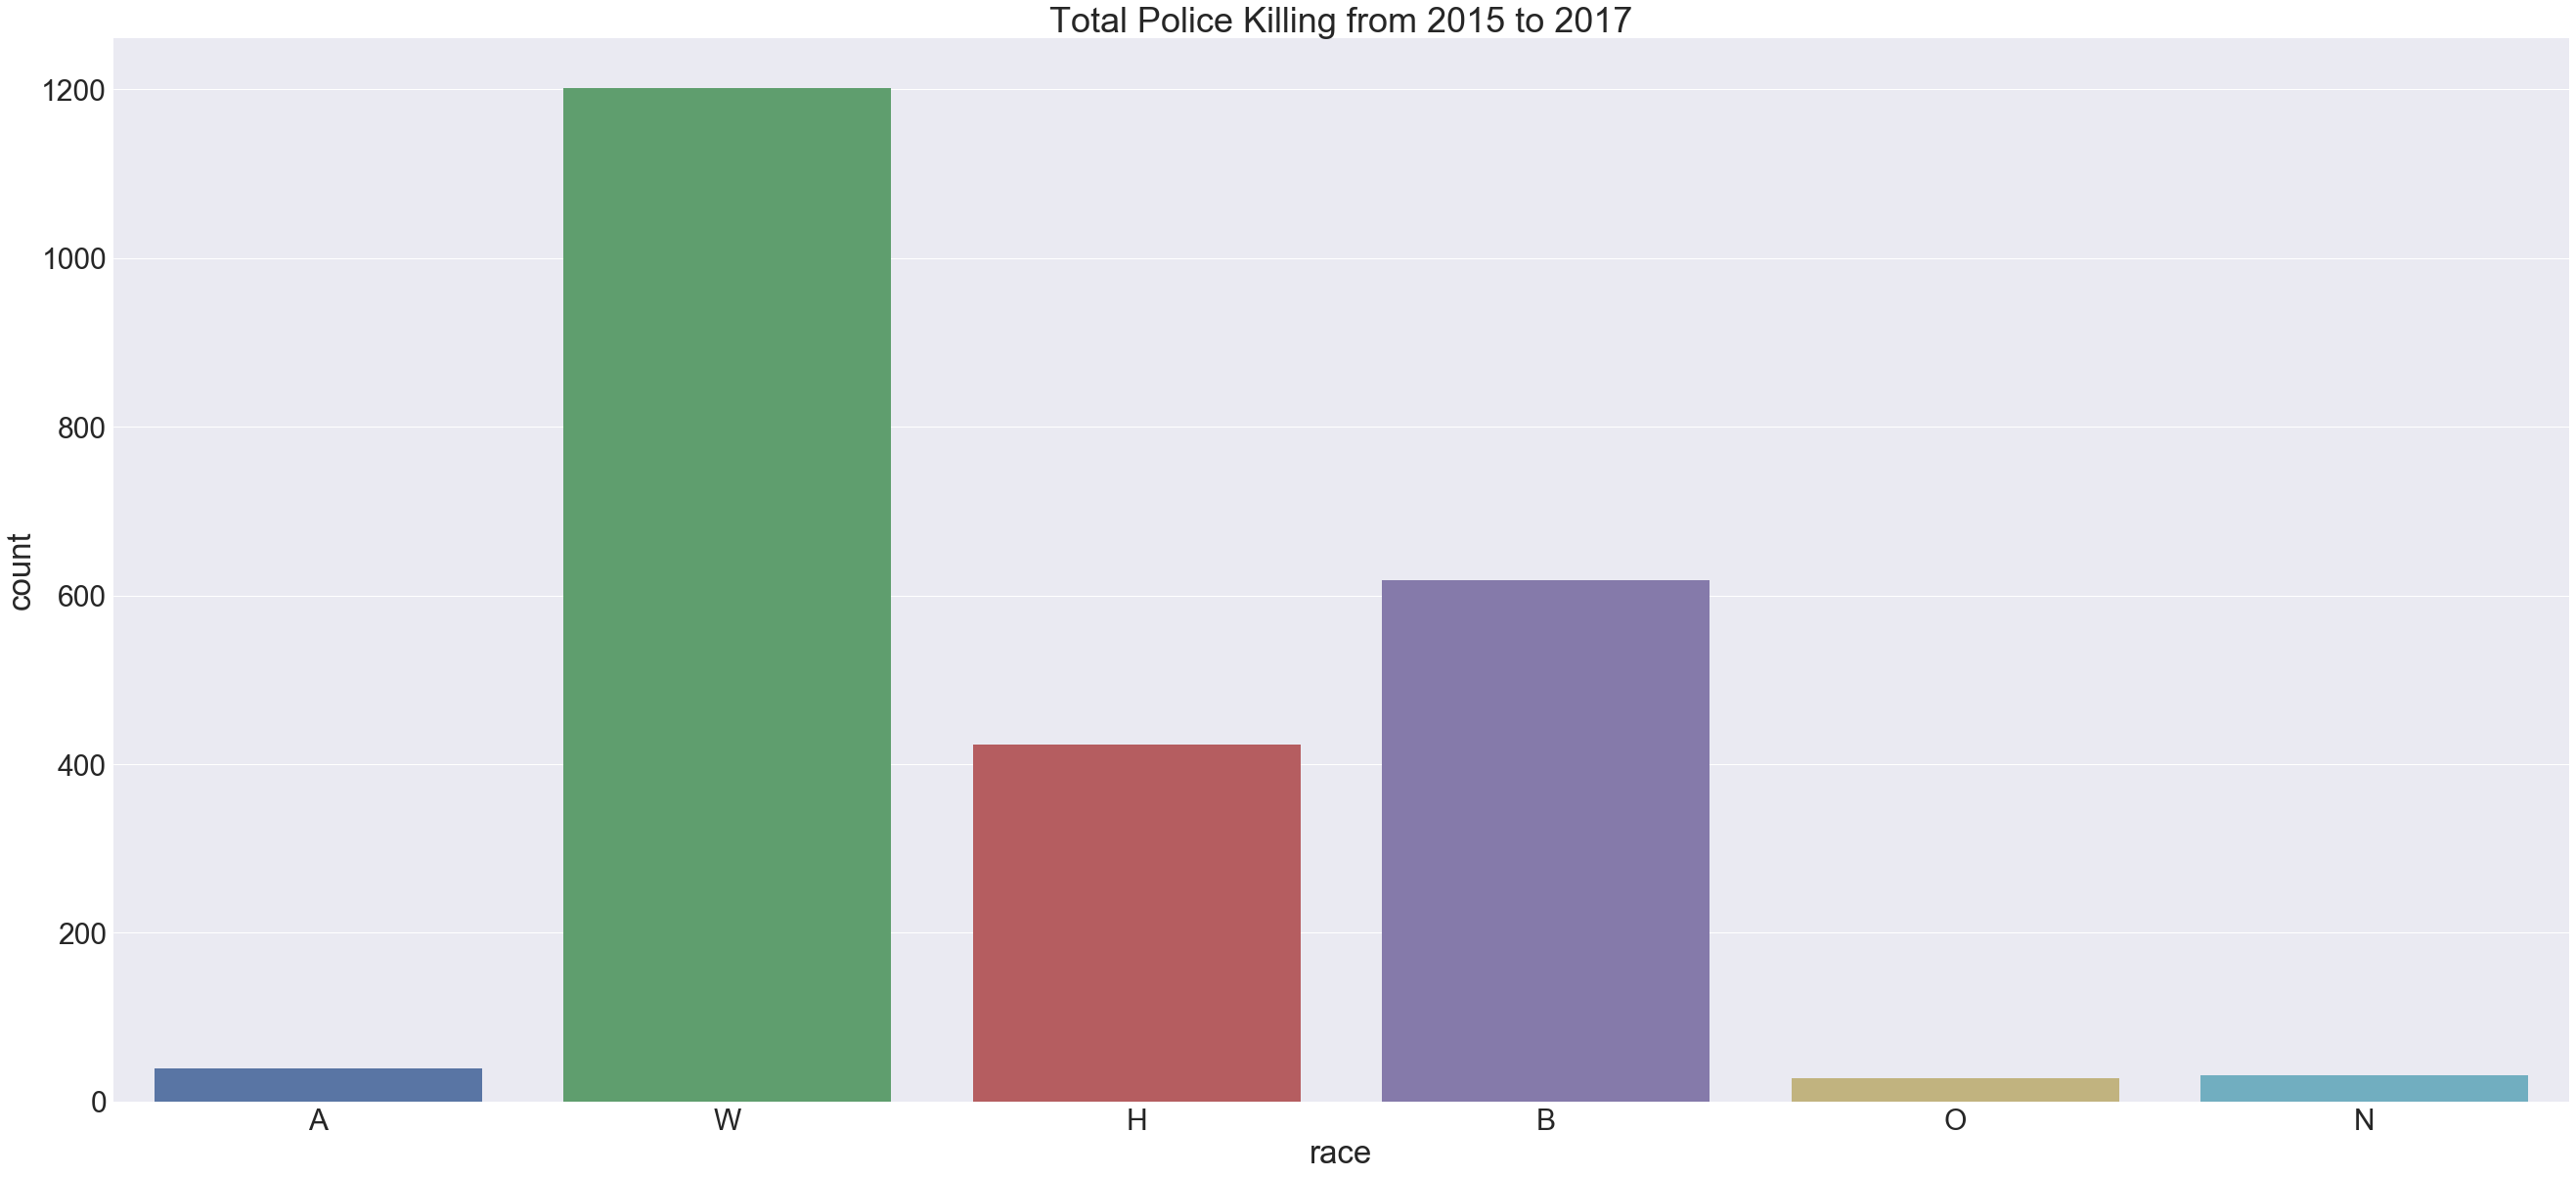

In [144]:
sns.set(font_scale = 3)
plt.figure(figsize=(45,20))
sns.countplot(police_killing.race)
plt.title('Total Police Killing from 2015 to 2017')

In [165]:
kill2016 = police_killing[police_killing.date.dt.year == 2016].race.value_counts()/police_killing[police_killing.date.dt.year==2016].shape[0]*100

In [166]:
kill2016 = kill2016.reset_index()
kill2016.columns = [['race', '%']]

In [246]:
#kill2016

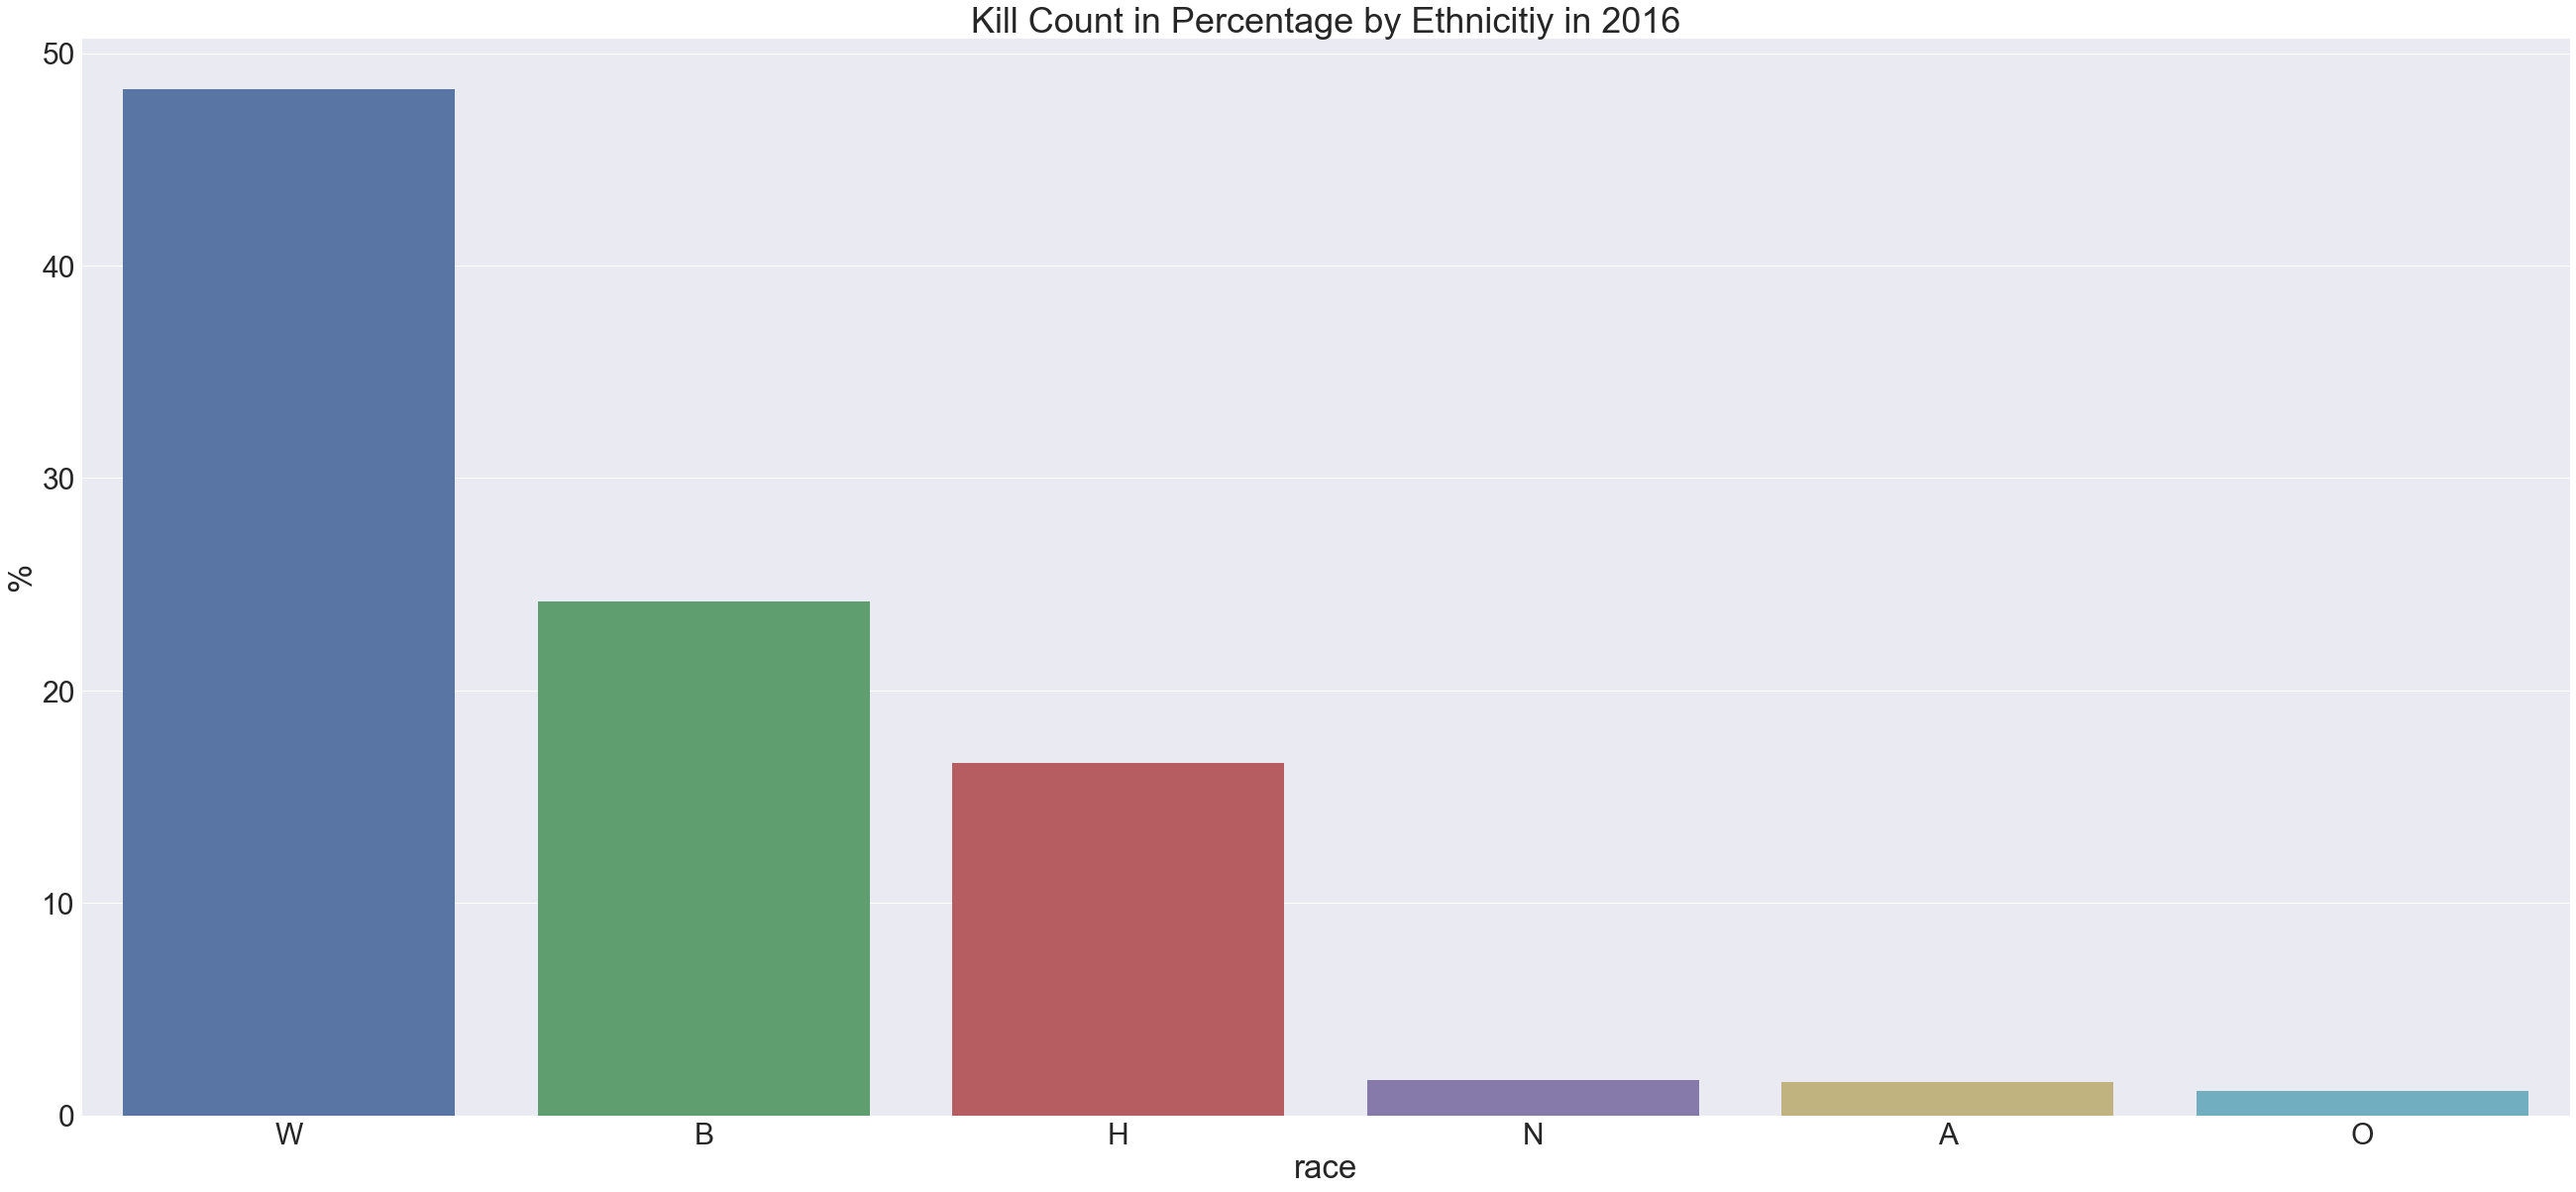

In [169]:
sns.set(font_scale = 3)
plt.figure(figsize=(45,20))
sns.barplot(x = 'race', y= '%', data = kill2016)
plt.title('Kill Count in Percentage by Ethnicitiy in 2016')

In [110]:
linechart = police_killing.groupby('month_year').race.value_counts().reset_index(name = 'count')

In [238]:
#linechart.head()

In [112]:
monthly_sum = police_killing.month_year.value_counts().reset_index()

In [113]:
monthly_sum.columns = [['month_year', 'monthly_sum']]

In [114]:
linechart = pd.merge(linechart, monthly_sum, on = 'month_year')

In [115]:
linechart['%'] = linechart['count']/linechart['monthly_sum'] * 100

In [116]:
linechart['year'] = linechart.month_year.dt.year

In [117]:
linechart = linechart.groupby(['race', 'year']).mean().reset_index()

In [119]:
linechart2 = linechart[linechart.race == 'W']['%'].reset_index(name = 'W')

In [237]:
#linechart2

In [121]:
linechart2['B'] = linechart[linechart.race == 'B']['%'].reset_index(name = 'B')['B']

In [122]:
linechart2['H'] = linechart[linechart.race == 'H']['%'].reset_index(name = 'H')['H']

In [123]:
linechart2['A'] = linechart[linechart.race == 'A']['%'].reset_index(name = 'A')['A']

In [124]:
linechart2['W:B'] = linechart2.W/linechart2.B

In [125]:
linechart2['W:H'] = linechart2.W/linechart2.H

In [126]:
linechart2['W:A'] = linechart2.W/linechart2.A

In [127]:
linechart2['year'] = ['2015','2016','2017']

In [236]:
#linechart2

In [235]:
#linechart2.iloc[:,5:]

In [130]:
linechart2 = pd.melt(linechart2.iloc[:,5:], id_vars= 'year', value_name= 'ratio')

In [234]:
#linechart2.iloc[0:6,:]

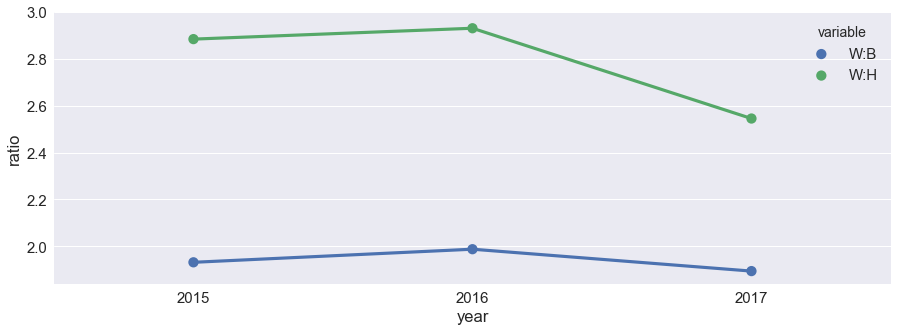

In [132]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,5))
sns.pointplot(x = 'year', y = 'ratio', hue = 'variable' ,data = linechart2.iloc[0:6,:])

I personally think this plot above is the most important one among all. According to the most recent census report, there are 61% of the population in the state are White, 12% are Black, and 18% are Hispanic, if there were no disparities in how police using their deadly force, the White:Black kill ratio should be around 5, and the White:Hispanic kill ratio should be around 3.4, however, from the plot we see that the W:B ratio is around 2.9 in the year of 2015 and 2016, and ropped to arppoximately 2.5 in 2017. The same situation happend to W:H ratio too. These changes of ratio indicates that there are disparities in how police using their forces, and it continued to worsen. We will continue to break down the data and dig deeper to find more evidence.

Recall that we have all the information regarding median income, poverty rate, high school completion rate, and race distribution in each county, we are now bring them altogether to see how the interact with each other.

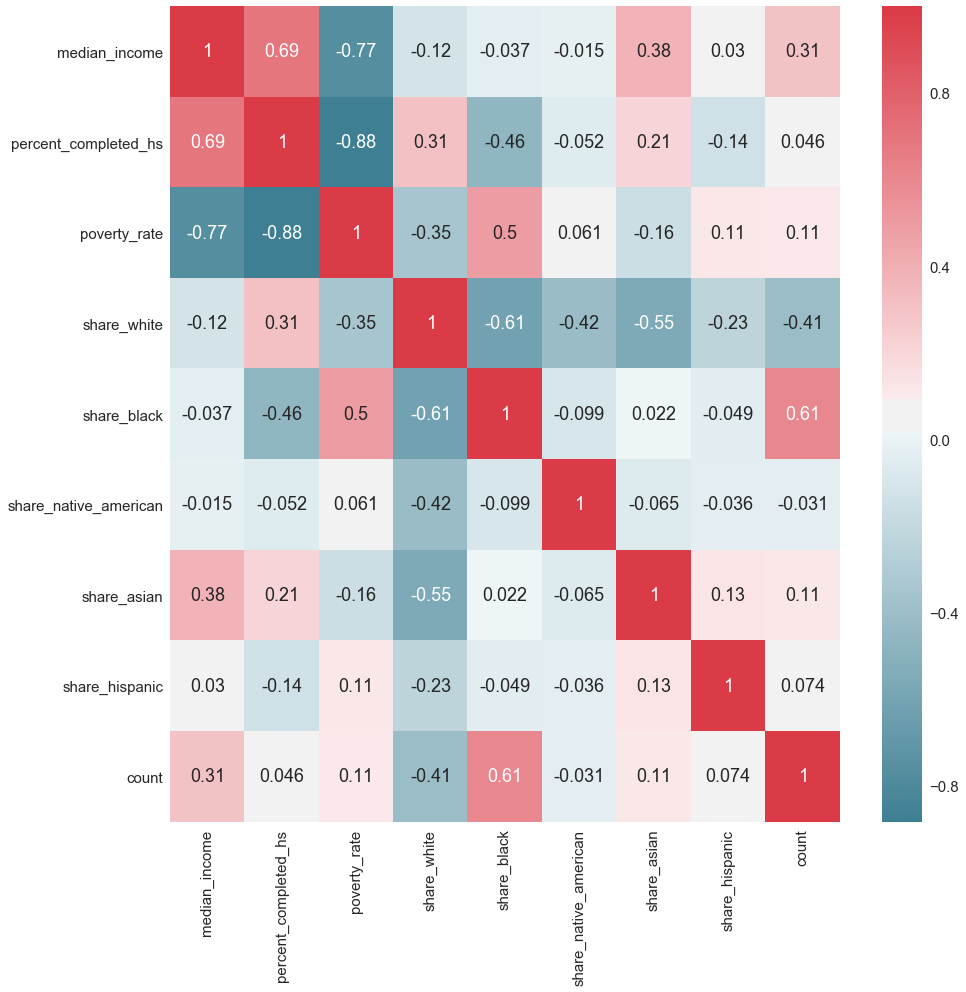

In [232]:
killing_count_df = police_killing.groupby(['state', 'city']).id.count().reset_index()
killing_count_df.columns = ['geographic_area', 'city', 'count']

merge_df2 = pd.merge(merge_df, killing_count_df, on = ['geographic_area','city'], how = 'outer')

corr = merge_df2.groupby('geographic_area').median().corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.set(font_scale = 1.5)
plt.figure(figsize=(15,15))
sns.heatmap(corr, cmap=cmap, annot= True)

We see that communities that have higher share of Black people has relatiely strong correlation with police killing, while white communities tend to have negative correlation with police killing.

## A deep dive into the disparities in use of deadly force
<a id = 'in-depth'></a>

###  People did not attack but killed
<a id = 'not_attack_but_killed'></a>

In [170]:
not_attack = police_killing[police_killing.threat_level == 'other'].race.value_counts()

In [171]:
not_attack = not_attack.reset_index()

In [173]:
not_attack['%'] = not_attack.race/police_killing[police_killing.threat_level == 'other'].shape[0] * 100

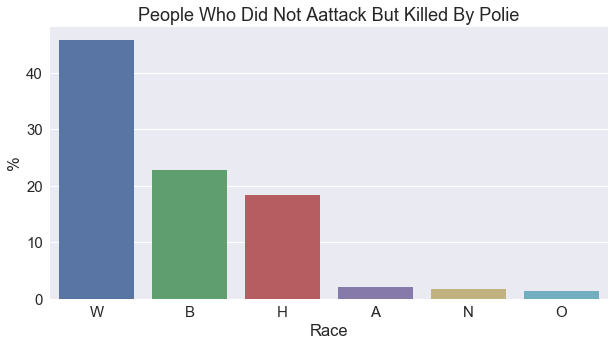

In [176]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10,5))

sns.barplot(x = 'index', y = '%', data = not_attack)

plt.xlabel('Race')
plt.ylabel('%')
plt.title('People Who Did Not Aattack But Killed By Polie')

Again, we see the percentage is not porportional to the ethnicity ratio in the US population.

### Unarmed victims are more likely to be minorities
<a id = 'unarmed'></a>

In [177]:
police_killing2 = police_killing

In [178]:
police_killing2.race.replace(['B','H','A','N','O'], 'Minority', inplace =True)

In [233]:
#police_killing2[police_killing2.armed == 'unarmed'].race.value_counts()

In [183]:
tmp2 = police_killing2.race.value_counts().reset_index()
tmp2.columns = ['race', 'total_count_by_race']

In [184]:
tmp = police_killing2.groupby('race').armed.value_counts().reset_index(name = 'death_count')

In [211]:
tmp3 = pd.merge(tmp, tmp2, on ='race')

In [212]:
tmp3['armed_pct'] = tmp.death_count/tmp3.total_count_by_race * 100

In [224]:
armed_df = pd.DataFrame(police_killing.armed.value_counts()).reset_index().iloc[0:9]
armed_df.columns = ['armed', 'count']

In [225]:
tmp3 = tmp3[tmp3.armed.isin(list(armed_df.armed.iloc[0:10]))]

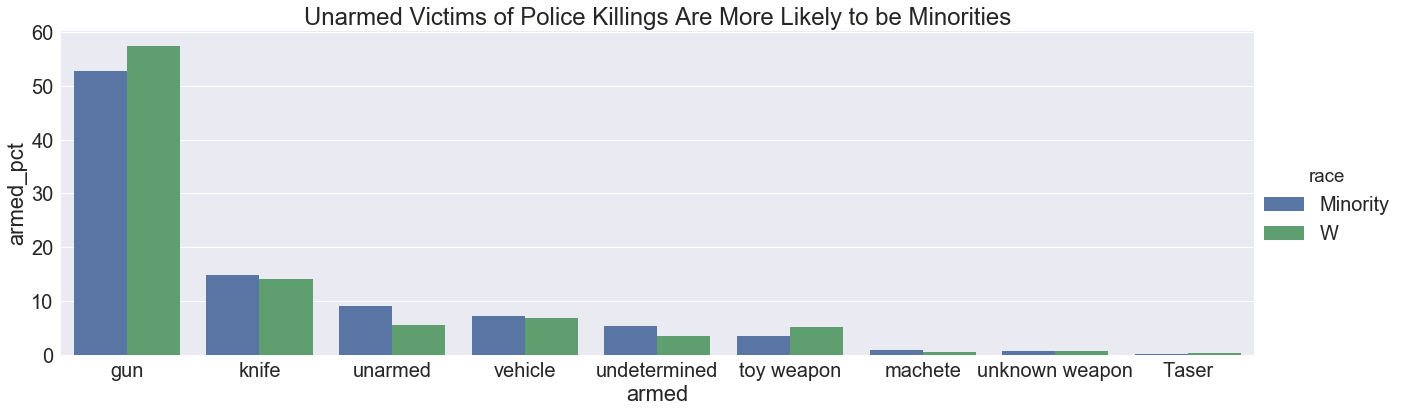

In [229]:
sns.set(font_scale=2)
sns.factorplot(x = 'armed', y ='armed_pct', hue = 'race', data = tmp3, kind = 'bar', size = 6, aspect = 3)
plt.title('Unarmed Victims of Police Killings Are More Likely to be Minorities')

We can see that victims that did not have weapons while the killing took place are more liekly to be minorities, once again proved our observation of disparities use of deadly force by the police in minorities.

## Conclusions
<a id = 'conclusion'></a>

After going through our datasets thoroughly, here are some key findings we found:

1. The total police killing rate has been slowly declining since 2015, having California and Texas being the biggest contributors. However, a follow-up study is needed if one wants to find out what are the reasons that drove down the police killing rate in these two states.
2. Demographic information provides us a better understanding how they affect police killings. We see that neigbhourhoods that have higher porportion of black people tend to have higher police killings, while communities with majority white people tend to have less police killings. We also find that median income ha strong positive correlation with high school completion rate, and black communities' teens seem to have difficulties graduating from high school, hence there are a big portion of black communities living under poverty line.d
3. It's certain that there is racial disparties in how police offciers exercise their deadly force, as we see that the black and hispanic people being killed by police is disproportionate compare to the race distribution in the United States. We also find that victims who were unarmed and killed by police are more likely to be minorities.